# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Final Project: Police Violence Investigation

### Initial Exploratory Data Analysis

**Harvard University**<br/>
**Fall 2020**<br/>
**Team Members**: Chika Okafor, Vasco Meerman, Matthew Parker, and David Koupaei

<hr style="height:2pt">



In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML, display
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
# Custom extra width cells
from IPython.core.display import HTML, display
display(HTML("<style>.container { width:100% !important; }</style>"))

<hr style="height:2pt">

## README

### Layout
#### Section 1: Look at mapping police data set

* Goals
    * See the state of the data
    * Determine if any cleaning is necessary
    * Perform cleaning
    * Initial snapshot look for trends
    * Identify which predictors might be useful
    
#### Section 2: Look at Wapo data set

* Goals
    * See the state of the data
    * Determine if any cleaning is necessary
    * Perform cleaning
    * Initial snapshot look for trends
    * Identify which predictors might be useful
    
#### Section 3: Make some Plots

* Goals
    * Start to generate plots
    * Continue EDA on primarily the Washington Post Dataset
    
    
#### Section 4: Initial look at models

* Goals
    * Now that the data is understood, take a look at initial models
    * Try a few options and review for feasibility and utility
    
#### Section 5: Extending Models Further

* Goals
    * Based on initial results of very little correlation with year and race for violent police shooting events, this section will switch gears to attempt to predict other items.  

  *Models:*
 * Logistic Regression baseline
 * Polynomial Features (3rd order) Regression
 * Lasso Regularized Model
 * Random Forest
 * Neural Net
 
  *Predictions:*
 1. Predict race based on all other WaPo predictors. 
 2. Predict mental illness based on other WaPo predictors.
 3. Predict justification of shootings with police violence predictors
    

## Contents
- [Section 1: Looking at Mapping Police Violence Dataset](#Section-1:-Looking-at-Mapping-Police-Violence-Dataset) 
- [Section 2: Now look at Washington Post Data](#Section-2:-Now-look-at-Washington-Post-Data) 
- [Section 3: Make some Plots!](#Section-3:-Make-some-Plots!)
- [Section 4: Initial Look at Models](#Section-4:-Initial-Look-at-Models)
- [Section 5: Extending the Models](#Section-5:-Extending-The-Models-Further)

<hr style="height:2pt">



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

import censusdata
import reverse_geocode

import warnings
warnings.filterwarnings('ignore')

## Information about the datasets

#### Washingpost dataset
In 2015, The Post began tracking more than a dozen details about each killing — including the race of the deceased, the circumstances of the shooting, whether the person was armed and whether the person was experiencing a mental-health crisis — by culling local news reports, law enforcement websites and social media, and by monitoring independent databases such as Killed by Police and Fatal Encounters. The Post conducted additional reporting in many cases.

#### Mapping Police Violence
This information has been meticulously sourced from the three largest, most comprehensive and impartial crowdsourced databases on police killings in the country: FatalEncounters.org, the U.S. Police Shootings Database and KilledbyPolice.net. 

#### Important notes
The mapping police violence dataset has more predictors and data entries which could still be of interest for this analysis, but it also has some NaN values and incomplete data. Washington Post sources their data from the mapping police violence and that datasets that mapping police violence also uses, but they cleaned the data more completely making it more useful for many required comparisons in this investigation. Therefore, the best data source to answer the proposed analysis questions is the Washington Post dataset.

In [4]:
# Data dir path from root of project
data_dir = "../data"

# Load data
data_mapping = pd.read_csv(f'{data_dir}/mapping-police-violence-24oct2020.csv')
# https://github.com/washingtonpost/data-police-shootings
data_wapo = pd.read_csv(f'{data_dir}/fatal-police-shootings-data-wsp.csv')

# Population Data
population_df = pd.read_csv(f'{data_dir}/nst-est2019-alldata.csv')

print(f"{len(data_mapping)} mapping police violence samples")
print(f"{len(data_wapo)} Washington Post Fatal Police Shootings samples")
print("\nMapping Columns:")
print(', '.join(data_mapping.columns))
print("\nWaPo Fatal Shootings Columns:")
print(', '.join(data_wapo.columns))

8507 mapping police violence samples
5716 Washington Post Fatal Police Shootings samples

Mapping Columns:
Victim's name, Victim's age, Victim's gender, Victim's race, URL of image of victim, Date of Incident (month/day/year), Street Address of Incident, City, State, Zipcode, County, Agency responsible for death, ORI Agency Identifier (if available), Cause of death, A brief description of the circumstances surrounding the death, Official disposition of death (justified or other), Criminal Charges?, Link to news article or photo of official document, Symptoms of mental illness?, Unarmed/Did Not Have an Actual Weapon, Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database), Alleged Threat Level (Source: WaPo), Fleeing (Source: WaPo), Body Camera (Source: WaPo), WaPo ID (If included in WaPo database), Off-Duty Killing?, Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rura

### <div class='exercise'><b>Section 1: Looking at Mapping Police Violence Dataset</b></div>
[▲ Return to contents](#Contents)
<div class='exercise'>
    

    
</div>

In [5]:
display(data_mapping.head())
display(data_mapping.info())
display(data_mapping.describe())
print("Police Mapping Dataset size is:", data_mapping.shape)


Victim's name Victim's age Victim's gender Victim's race URL of image of victim Date of Incident (month/day/year) Street Address of Incident               City State  Zipcode       County          Agency responsible for death ORI Agency Identifier (if available)  Cause of death A brief description of the circumstances surrounding the death Official disposition of death (justified or other) Criminal Charges? Link to news article or photo of official document Symptoms of mental illness?  Unarmed/Did Not Have an Actual Weapon Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database) Alleged Threat Level (Source: WaPo) Fleeing (Source: WaPo) Body Camera (Source: WaPo)  WaPo ID (If included in WaPo database) Off-Duty Killing? Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )  MPV ID  Fatal Encounters ID
0  Name withheld by police          NaN            Male           NaN                    NaN                        10/14/2020                        NaN            Cookson    OK      NaN     Cherokee  Cherokee County Sheriff's Department                            OK0110000  Gunshot, Taser  A deputy responded to a disturbance called aro...                                          Pending investigation  No known charges  https://www.newson6.com/story/5f87912629c6bb05...                          No                        Allegedly Armed                                              spear                                                           attack            Not fleeing                         No                                  6232.0               NaN                                                NaN                                                                                                                             NaN                  NaN
1  Name withheld by police          NaN            Male           NaN                    NaN                        10/14/2020                        NaN  South Los Angeles    CA      NaN  Los Angeles         Los Angeles Police Department                            CA0194200         Gunshot  Around 9:50PM officers were driving by the 76 ...                                          Pending investigation  No known charges  https://ktla.com/news/local-news/lapd-suspect-...                          No                        Allegedly Armed                                                gun                                                           attack            Not fleeing                         No                                  6231.0               NaN                                                NaN                                                                                                                             NaN                  NaN
2  Name withheld by police          NaN            Male         White                    NaN                        10/14/2020                        NaN              Chico    CA      NaN        Butte               Chico Police Department                            CA0040200         Gunshot  A man who reportedly brandished a knife and th...                                          Pending investigation  No known charges  https://www.chicoer.com/2020/10/15/chico-polic...                          No                        Allegedly Armed                                              knife                                                           attack                   foot                         No                                  6230.0               NaN                                                NaN                                                                                                                             NaN                  NaN
3           Marcos Ramirez           27            Male      Hispanic                    NaN                        10/13/2020                       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8507 entries, 0 to 8506
Data columns (total 29 columns):
 #   Column                                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                                      --------------  -----  
 0   Victim's name                                                                                                                                                               8507 non-null   object 
 1   Victim's age                                                                                                                                                                8492 non-null   object 
 2   Victim's gender                                                                     

None

Zipcode  WaPo ID (If included in WaPo database)       MPV ID  Fatal Encounters ID
count   8465.000000                             5592.000000  8485.000000          8417.000000
mean   60584.679622                             3116.519134  4261.408721         20024.425686
std    28088.279417                             1765.307092  2454.204918          5196.315249
min     1085.000000                                3.000000     1.000000           350.000000
25%    33525.000000                             1591.750000  2139.000000         15550.000000
50%    67203.000000                             3111.500000  4262.000000         18525.000000
75%    85756.000000                             4639.250000  6386.000000         25052.000000
max    99801.000000                             6232.000000  8511.000000         28933.000000

Police Mapping Dataset size is: (8507, 29)


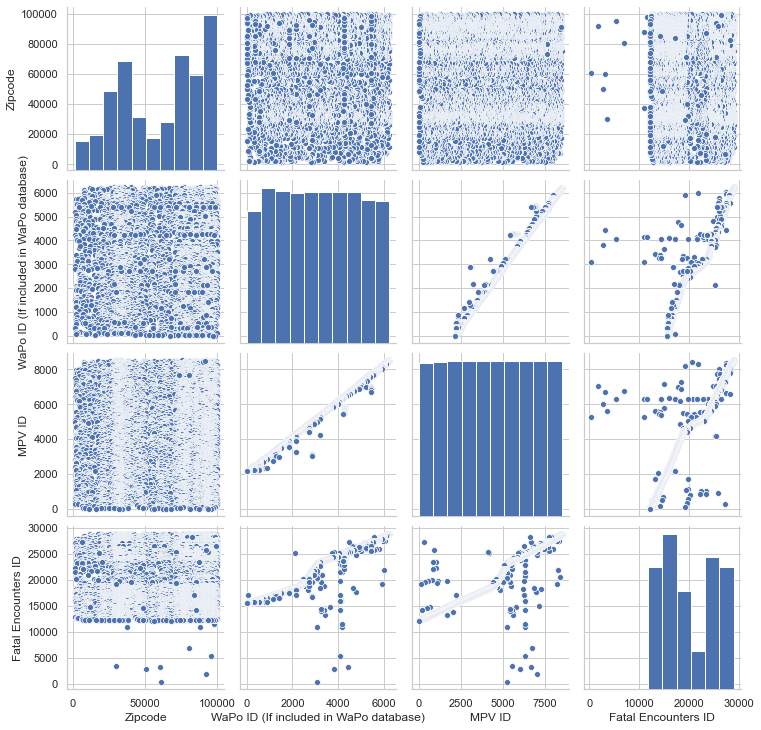

In [7]:
sns.pairplot(data=data_mapping)


In [8]:
# do we have any null values?

data_mapping.isnull().values.any()

# where are they?

for col in data_mapping.columns:
    null_count = data_mapping[col].isnull().sum()
    print(col, ": ", null_count)

Victim's name :  0
Victim's age :  15
Victim's gender :  13
Victim's race :  4
URL of image of victim :  3939
Date of Incident (month/day/year) :  0
Street Address of Incident :  95
City :  6
State :  0
Zipcode :  42
County :  14
Agency responsible for death :  16
ORI Agency Identifier (if available) :  2
Cause of death :  0
A brief description of the circumstances surrounding the death :  17
Official disposition of death (justified or other) :  11
Criminal Charges? :  0
Link to news article or photo of official document :  11
Symptoms of mental illness? :  11
Unarmed/Did Not Have an Actual Weapon :  0
Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database) :  2
Alleged Threat Level (Source: WaPo) :  2451
Fleeing (Source: WaPo) :  2893
Body Camera (Source: WaPo) :  2996
WaPo ID (If included in WaPo database) :  2915
Off-Duty Killing? :  8268
Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full

In [9]:
# drop some of the columns which have too many N/A or don't really help us

# not used and lots of missing
df1 = data_mapping.drop('URL of image of victim', axis=1)

# almost all NaN
df1 = df1.drop('Off-Duty Killing?', axis=1)

# not really used
df1 = df1.drop(['Street Address of Incident',
                'A brief description of the circumstances surrounding the death',
                "Victim's name",
                'Link to news article or photo of official document',
                'ORI Agency Identifier (if available)'],
                axis=1)

# rename a few annoying columns
df1.rename(columns={'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )':'geography'}, inplace=True)
df1.rename(columns={'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)':'Alleged Weapon'}, inplace=True)

# fix a few of the duplicate groupings

df1['Symptoms of mental illness?'] = df1['Symptoms of mental illness?'].str.replace('unknown', 'Unknown')
df1['Symptoms of mental illness?'] = df1['Symptoms of mental illness?'].str.replace('Unkown', 'Unknown')

df1['Alleged Threat Level (Source: WaPo)'] = df1['Alleged Threat Level (Source: WaPo)'].str.replace('Other', 'other')

df1['Fleeing (Source: WaPo)'] = df1['Fleeing (Source: WaPo)'].str.replace('other', 'Other')
df1['Fleeing (Source: WaPo)'] = df1['Fleeing (Source: WaPo)'].str.replace('not fleeing', 'Not fleeing')
df1['Fleeing (Source: WaPo)'] = df1['Fleeing (Source: WaPo)'].str.replace('Not Fleeing', 'Not fleeing')
df1['Fleeing (Source: WaPo)'] = df1['Fleeing (Source: WaPo)'].str.replace('foot', 'Foot')
df1['Fleeing (Source: WaPo)'] = df1['Fleeing (Source: WaPo)'].str.replace('car', 'Car')

df1['Body Camera (Source: WaPo)'] = df1['Body Camera (Source: WaPo)'].str.replace('no', 'No')
df1['Body Camera (Source: WaPo)'] = df1['Body Camera (Source: WaPo)'].str.replace('Dashcam video', 'Dashcam Video')


Now see what needs further cleaning

In [10]:
for col in df1.columns:
    display(df1[col].value_counts())

25         279
31         275
27         268
Unknown    268
28         266
          ... 
91           1
88           1
107          1
40s          1
95           1
Name: Victim's age, Length: 88, dtype: int64

Male           8055
Female          425
Transgender       9
Unknown           4
Male              1
Name: Victim's gender, dtype: int64

White               3739
Black               2138
Hispanic            1467
Unknown race         863
Asian                131
Native American      119
Pacific Islander      46
Name: Victim's race, dtype: int64

6/16/2013     10
6/8/2013       9
12/26/2017     9
1/28/2019      9
2/1/2018       9
              ..
6/18/2018      1
1/19/2015      1
2/1/2019       1
2/29/2016      1
3/30/2017      1
Name: Date of Incident (month/day/year), Length: 2675, dtype: int64

Phoenix        121
Los Angeles    121
Houston        109
Chicago         84
San Antonio     66
              ... 
Clover           1
Fairborn         1
Gate City        1
Micanopy         1
Hollis           1
Name: City, Length: 3102, dtype: int64

CA    1312
TX     785
FL     613
AZ     376
GA     299
CO     267
WA     245
NC     236
OK     236
OH     229
MO     226
TN     201
IL     190
PA     185
NY     174
LA     167
NM     158
AL     153
NV     144
IN     141
MD     139
KY     137
VA     136
SC     133
MI     133
WI     125
OR     124
AR     117
MS     115
NJ     113
UT      94
MN      92
KS      80
WV      76
MA      58
ID      53
IA      52
MT      48
AK      47
CT      40
HI      39
NE      39
ME      34
DC      27
SD      26
WY      22
DE      21
NH      18
ND      14
VT      12
RI       6
Name: State, dtype: int64

88001.0    11
93307.0    10
90044.0    10
87121.0    10
85009.0    10
           ..
30428.0     1
78942.0     1
67132.0     1
85085.0     1
37888.0     1
Name: Zipcode, Length: 5329, dtype: int64

Los Angeles    361
Maricopa       231
Harris         136
Jefferson      124
Orange         123
              ... 
Juab             1
Montezuma        1
McLeod           1
Indiana          1
Wheeler          1
Name: County, Length: 1152, dtype: int64

Los Angeles Police Department                                           132
Phoenix Police Department                                               116
Los Angeles County Sheriff's Department                                 101
Chicago Police Department                                                81
New York Police Department                                               79
                                                                       ... 
St. Clair Shores Police Department                                        1
Cowley County Sheriff's Department                                        1
Sumter Police Department                                                  1
Iredell County Sheriff's Office, North Carolina State Highway Patrol      1
East Millinocket Police Department                                        1
Name: Agency responsible for death, Length: 3091, dtype: int64

Gunshot                                    7833
Gunshot, Taser                              253
Taser                                       247
Vehicle                                      44
Beaten                                       31
Physical Restraint                           25
Tasered                                      18
Physical restraint                            9
Asphyxiated                                   9
Other                                         5
Gunshot, Police Dog                           5
Pepper Spray                                  4
Gunshot, Pepper Spray                         4
Bean bag                                      2
Taser, Physical Restraint                     2
Gunshot, Unspecified Less Lethal Weapon       1
Taser, Pepper Spray, Beaten                   1
Gunshot, Taser, Pepper spray                  1
Taser, Pepper spray, beaten                   1
Gunshot, Taser, Baton                         1
Taser, Baton                            

Pending investigation/No Known Charges                                          4862
Unreported                                                                      1225
Justified                                                                        651
Pending investigation                                                            446
Justified by District Attorney                                                   350
                                                                                ... 
Charged with murder and attemped murder                                            1
unknown                                                                            1
Murder / Suicide                                                                   1
Charged with manslaughter, Plead no contest, Sentenced to 10 years probation       1
Pending investigation/No Known Chargess                                            1
Name: Official disposition of death (justified or other), Length:

No known charges                                                                 8361
Charged with a crime                                                               69
Charged, Acquitted                                                                 29
Charged, Mistrial                                                                   6
Charged, Charges Dropped                                                            5
Charged, Convicted                                                                  4
Charged, Convicted, Sentenced to 30 years in prison                                 2
Charged, Convicted, Sentenced to life in prison                                     2
Charged, Convicted, Sentenced to 5 years probation.                                 2
Charged, Convicted, Sentenced to 1 year in jail, 3 years suspended                  1
Charged with a crime, Acquitted                                                     1
Charged, Convicted, Sentenced to 7 years in prison    

No                     5415
Yes                    1598
Unknown                1164
Drug or alcohol use     318
Unknown                   1
Name: Symptoms of mental illness?, dtype: int64

Allegedly Armed                          6084
Unarmed/Did Not Have an Actual Weapon    1164
Unclear                                   697
Vehicle                                   562
Name: Unarmed/Did Not Have an Actual Weapon, dtype: int64

gun                   4432
knife                 1129
no object              888
undetermined           532
vehicle                499
                      ... 
gun, vehicle             1
bow and arrow            1
bike                     1
knife and scissors       1
samurai sword            1
Name: Alleged Weapon, Length: 170, dtype: int64

attack          3922
other           1803
undetermined     331
Name: Alleged Threat Level (Source: WaPo), dtype: int64

Not fleeing    3770
Car             937
Foot            732
Other           175
Name: Fleeing (Source: WaPo), dtype: int64

No                    4905
Yes                    592
Surveillance Video       5
Bystander Video          4
Dashcam Video            3
Surveillance video       2
Name: Body Camera (Source: WaPo), dtype: int64

3232.0    2
3784.0    2
6117.0    2
3516.0    2
4731.0    1
         ..
6020.0    1
4650.0    1
3766.0    1
3226.0    1
6144.0    1
Name: WaPo ID (If included in WaPo database), Length: 5588, dtype: int64

Suburban        4240
Urban           2287
Rural           1899
Undetermined      73
Name: geography, dtype: int64

5972.0    2
4603.0    1
4629.0    1
497.0     1
590.0     1
         ..
2906.0    1
2268.0    1
2129.0    1
1794.0    1
8448.0    1
Name: MPV ID, Length: 8484, dtype: int64

28926.0    2
24323.0    2
28921.0    2
28920.0    2
20232.0    1
          ..
25960.0    1
14498.0    1
17377.0    1
14854.0    1
28160.0    1
Name: Fatal Encounters ID, Length: 8413, dtype: int64

Taking a look at the victim's race

In [11]:
data_mapping["Victim's race"].value_counts()

White               3739
Black               2138
Hispanic            1467
Unknown race         863
Asian                131
Native American      119
Pacific Islander      46
Name: Victim's race, dtype: int64

Where are most of the events taking place?


In [12]:
display(df1["State"].value_counts())
display(df1["City"].value_counts())

CA    1312
TX     785
FL     613
AZ     376
GA     299
CO     267
WA     245
NC     236
OK     236
OH     229
MO     226
TN     201
IL     190
PA     185
NY     174
LA     167
NM     158
AL     153
NV     144
IN     141
MD     139
KY     137
VA     136
SC     133
MI     133
WI     125
OR     124
AR     117
MS     115
NJ     113
UT      94
MN      92
KS      80
WV      76
MA      58
ID      53
IA      52
MT      48
AK      47
CT      40
HI      39
NE      39
ME      34
DC      27
SD      26
WY      22
DE      21
NH      18
ND      14
VT      12
RI       6
Name: State, dtype: int64

Phoenix        121
Los Angeles    121
Houston        109
Chicago         84
San Antonio     66
              ... 
Clover           1
Fairborn         1
Gate City        1
Micanopy         1
Hollis           1
Name: City, Length: 3102, dtype: int64

In [13]:
# your code here 



df1['Cause of death'] = df1['Cause of death'].str.replace('Tasered', 'Taser')
df1['Cause of death'] = df1['Cause of death'].str.replace('Taser, Beaten', 'Taser')
df1['Cause of death'] = df1['Cause of death'].str.replace('Taser, Baton', 'Taser')
df1['Cause of death'] = df1['Cause of death'].str.replace('Taser, Physical Restraint', 'Taser')
df1['Cause of death'] = df1['Cause of death'].str.replace('Taser, Pepper Spray, Beaten', 'Taser')
df1['Cause of death'] = df1['Cause of death'].str.replace('Taser, Pepper spray, beaten', 'Taser')

df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Police Dog', 'Gunshot')
df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Taser', 'Gunshot')
df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Pepper Spray', 'Gunshot')
df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Pepper spray', 'Gunshot')
df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Pepper Spray', 'Gunshot')
df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Bean Bag Gun', 'Gunshot')
df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Beanbag Gun', 'Gunshot')
df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Beanbag Shotgun', 'Gunshot')
df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Stabbed', 'Gunshot')
df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Unspecified Less Lethal Weapon', 'Gunshot')
df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Vehicle', 'Gunshot')

df1['Cause of death'] = df1['Cause of death'].str.replace('Physical restraint', 'Physical Restraint')
df1['Cause of death'] = df1['Cause of death'].str.replace('Baton, Pepper Spray, Physical Restraint', 'Beaten')
df1['Cause of death'] = df1['Cause of death'].str.replace('Beaten/Bludgeoned with instrument', 'Beaten')
df1['Cause of death'] = df1['Cause of death'].str.replace('Chemical agent/Pepper spray ', 'Pepper Spray')



df1['Cause of death'].value_counts()


Gunshot                        8103
Taser                           271
Vehicle                          44
Physical Restraint               34
Beaten                           33
Asphyxiated                       9
Other                             5
Pepper Spray                      4
Bean bag                          2
Chemical agent/Pepper spray       1
Bomb                              1
Name: Cause of death, dtype: int64

In [14]:

df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 5 years probation.', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 30 years in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to life in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 1 year in prison and 4 years probation', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 40 years in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 16 years in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 5 years in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 6 years', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 1 year in jail, 3 years suspended', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted without parole, plus 16 years', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 14 years in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 7 years in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 12 years in prison and 8 years in probation', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 20 years in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 2.5 years in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 3 years probation', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 25 years in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 50 years', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 4 years', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted of reckless homicide, sentenced to 1 year in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 3 months in jail ', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 1 year in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 10 years in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 40 years to Life in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted ', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to Life in Prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 3 months in jail', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Plead No Contest, Sentenced to 10 years probation', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 18 months', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convictedin prison', 'Charged, Convicted')

df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Charges Dropped', 'Charged, Acquitted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged with a crime, Acquitted', 'Charged, Acquitted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Mistrial, Plead Guilty to Civil Rights Charges', 'Charged, Mistrial')


display(df1["Criminal Charges?"].value_counts())

No known charges        8361
Charged with a crime      69
Charged, Convicted        35
Charged, Acquitted        35
Charged, Mistrial          7
Name: Criminal Charges?, dtype: int64

In [15]:
df1["Symptoms of mental illness?"] = df1["Symptoms of mental illness?"].str.replace('Unknown ', 'Unknown')
df1["Symptoms of mental illness?"] = df1["Symptoms of mental illness?"].str.replace('nan', 'Unknown')
display(df1["Symptoms of mental illness?"].value_counts())

No                     5415
Yes                    1598
Unknown                1165
Drug or alcohol use     318
Name: Symptoms of mental illness?, dtype: int64

In [16]:
display(df1["Unarmed/Did Not Have an Actual Weapon"].value_counts())

Allegedly Armed                          6084
Unarmed/Did Not Have an Actual Weapon    1164
Unclear                                   697
Vehicle                                   562
Name: Unarmed/Did Not Have an Actual Weapon, dtype: int64

In [17]:
display(df1["Fleeing (Source: WaPo)"].value_counts())

Not fleeing    3770
Car             937
Foot            732
Other           175
Name: Fleeing (Source: WaPo), dtype: int64

In [18]:
df1["Body Camera (Source: WaPo)"] = df1["Body Camera (Source: WaPo)"].str.replace('Surveillance video', 'Surveillance Video')
df1["Body Camera (Source: WaPo)"] = df1["Body Camera (Source: WaPo)"].str.replace('nan', 'Unknown')

display(df1["Body Camera (Source: WaPo)"].value_counts())

No                    4905
Yes                    592
Surveillance Video       7
Bystander Video          4
Dashcam Video            3
Name: Body Camera (Source: WaPo), dtype: int64

In [19]:

df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder, aquitted', 'Charged, Aquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted, Sentenced to 18 months', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with criminally negligent homicide, Acquitted', 'Charged, Aquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by District Attorney/Civil suit/Pending', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified by County Commonwealth's Attorney", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified by District Attorney", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with manslaughter, Charges Tossed under Stand Your Ground law', 'Charged, Aquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder and aggravated assault', 'Charged, Aquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, charges dismissed', 'Charged, Aquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted of murder, Sentenced to 30 years in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Pending investigation/No Known Charges; Minnesota Bureau of Criminal Apprehension, Minnesota State Patrol, Anoka County Sheriff's Office, Fridley Police Department, Lino Lakes Police Department", 'Pending investigation/No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Pending investigation', 'Pending investigation/No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted of murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted of involuntary manslaugher, Sentenced to 1 year in jail, 3 years suspended', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder and involuntary manslaughter, Convicted, Sentenced to Life in Prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by County Prosecuting Attorney', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, convicted of manslaughter', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted, Sentenced to 5 years in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted, Sentenced to five years probation.', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder, Convicted of manslaughter, Sentenced to 14 years in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with negligent homicide', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified/Civil Suit/Family awarded money', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified; New York State Police investigation; Schwalm's brother offered condolences to the deputy because of his brother's illness.", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted of involuntary manslaughter, Sentenced to 5 years in Prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted of reckless manslaughter, Sentenced to 6 years', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted of felony murder, Sentenced to life without parole, plus 16 years', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Unjustified, Officer fired', 'Pending investigation/No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with manslaughter, Plead no contest, Sentenced to 10 years probation', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Pending investigation/No Known Charges/No Known Charges/No Known Charges/No Known Charges/No Known Charges', 'No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder, Convicted of aggravated assault, violating the oath of his office and making a false statement, Sentenced to 12 years in prison and 8 years probation ', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('unknown', 'Unknown')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('No Known Charges/No Known Charges', 'Pending investigation/No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Cleared by coroner's inquest/Civil suit/Family awarded money", 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted of misdemeanor misconduct in office, Sentenced to 3 years probation', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted and malfeasance', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by external agency', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted of second-degree murder, Sentenced to 20 years in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with manslaughter, Mistrial', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted ', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with first-degree murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with 3rd degree murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with reckless homicide, Acquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted, Acquitted', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Pending investigation/No Known Charges/No Known Charges', 'Pending investigation/No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder, possession of a firearm during the commission of a crime and violation of oath', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified by State's Attorney/Civil suit/Pending", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Grand jury/No bill or Cleared/Justified', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof manslaughter and attempted murder, Sentenced to 25 years', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof voluntary manslaughter, Sentenced to 6 years', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Unjustified by internal review', 'Unjustified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Charged, Mistrial declared, Pled Guilty for Violating Walter Scott's Civil Rights", 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Grand jury/No bill or Cleared', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof voluntary manslaughter, Sentenced to 3 months in jail', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with involuntary manslaughter, Acquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with 2nd degreee murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof misdemeanor reckless conduct with a firearm, Sentenced to 1 year in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with 1st degree wanton endangerment', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by Prosecutor', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with felony negligent homicide, Acquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by Department of Justice', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified by State's Attorney", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('No Known Chargess', 'Pending investigation/No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof aggravated manslaughter and child endangerment, Sentenced to 30 years in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder, Convicted of aggravated assault, violating the oath of his office and making a false statement, Sentenced to 12 years in prison and 8 years probation', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof manslaughter, Sentenced to 2.5 years in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified by coroner's inquest", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by Attorney General', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof Third Degree Murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with manslaughter and reckless discharge of firearm', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof first-degree murder, Sentenced to life in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by Fifth Judicial Circuit Solicitor', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder, Ruled not guilty by reason of insanity', 'Charged, Acquittted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Acquittted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with homicide and felony firearm charges, Acquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with criminal homicide, assault, and reckless endangerment', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof felony murder, Sentenced to life in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof reckless homicide, sentenced to 1 year in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with manslaughter, Convicted of violating oath of office, Sentenced to 1 year in prison and 4 years probation', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with voluntary manslaughter', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with involuntary manslaughter, Plead Guilty to Involuntary Manslaughter, Sentenced to 7 years in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof 2nd degree manslaughter, Sentenced to 4 years', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Murder / Suicide', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with 2nd degree murder or first degree manslaughter', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof second-degree manslaughter and one count of official misconduct, Sentenced to five years probation.', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with manslaughter, acquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified by State Attorney's Office", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted, Sentenced to 50 years', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged and Civil suit/Family awarded money', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('No Known Charges; Snohomish County Multiagency Response Team', 'Pending investigation/No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('No Known Charges ', 'No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with second-degree murder, Acquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged witth 1st degree manslaughter, Acquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with manslaughter, Charges Dismissed in Federal Court', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with 1st degree murder, armed criminal action and two counts of child endangerment, Acquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by U.S. Attorney', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder and attemped murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Unjustified', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted, Sentenced to 10 years in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified by County Prosecutor's Office", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with involuntary manslaughter', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with 1st degree murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Pending investigaton', 'No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified by County State's Attorney", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Cleared by district attorney', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by Special Prosecutor', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Administrative discipline/Civil suit/Family awarded money', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with manslaughter, Charges Dropped', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified by Solicitor's Office", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof second-degree murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified/Civil suit/Family awarded money', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Ruled accidental', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('No Known Charges; Georgia Bureau of Investigation', 'Pending investigation/No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with homicide', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by outside agency/Civil suit/Family awarded money', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Other justified (Civilian board/Prosecutor/District Attorney/Coroner)', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Accidental', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with a crime', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by Solicitor', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with 2nd degree murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Civil suit/Pending', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder, Acquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Cleared', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with second-degree murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Other justified (Civilian board/Prosecutor/District Attorney/Coroner) ', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Mistrial declared', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Aquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Administrative discipline', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified's Office", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by Prosecuting Attorney', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified by Commonwealth's Attorney", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Found Excusable', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with manslaughter, Acquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Other justified (Civilian board/Prosecutor/District Attorney/Coroner)", 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by County Attorney', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by State Attorney', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by outside agency', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by County Prosecutor', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Other justified (Civilian board/Coroner/Medical examiner) ', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Murder/suicide', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with manslaughter', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Civil suit/Family awarded money', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by internal review', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Under investigation', 'Pending investigation/No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedwith felony murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by Inspector General', 'Justified')




display(df1['Official disposition of death (justified or other)'].value_counts())

Pending investigation/Pending investigation/No Known Charges                          4865
Justified                                                                             1451
Unreported                                                                            1225
Pending investigation/No Known Charges                                                 460
Unknown                                                                                254
Charged, Convicted                                                                     151
Charged, Acquitted                                                                      56
Other justified (Civilian board/Coroner/Medical examiner)                               14
Charged                                                                                  9
Pending investigation/Pending investigation/Pending investigation/No Known Charges       4
Other justified (Civilian board/Prosecutor/District Attorney/Coroner)                    3

Let's convert all the boolean predictors

In [20]:
# group all of the charges together for now
df1["Criminal Charges?_bool"]= df1["Criminal Charges?"].apply(lambda x: 0 if x=='No known charges' else 1)

# grouping all symptoms not classified as "yes"
df1["Symptoms of mental illness?_bool"]= df1["Symptoms of mental illness?"].apply(lambda x: 1 if x=='Yes' else 0)

# grouping all 'allegedly armed' as "yes" vs all other answers
df1["Unarmed/Did Not Have an Actual Weapon_bool"]= df1["Unarmed/Did Not Have an Actual Weapon"].apply(lambda x: 1 if x=='Allegedly Armed' else 0)

# grouping all spellings of 'not fleeing'
df1["Fleeing (Source: WaPo)_bool"]= df1["Fleeing (Source: WaPo)"].apply(lambda x: 0 if x in ['Not fleeing', 'not fleeing', 'Not Fleeing'] else 1)

# grouping all spellings of 'no'
df1["Body Camera (Source: WaPo)_bool"]= df1["Body Camera (Source: WaPo)"].apply(lambda x: 0 if x in ['No', 'no'] else 1)


In [21]:
display(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8507 entries, 0 to 8506
Data columns (total 27 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Victim's age                                        8492 non-null   object 
 1   Victim's gender                                     8494 non-null   object 
 2   Victim's race                                       8503 non-null   object 
 3   Date of Incident (month/day/year)                   8507 non-null   object 
 4   City                                                8501 non-null   object 
 5   State                                               8507 non-null   object 
 6   Zipcode                                             8465 non-null   float64
 7   County                                              8493 non-null   object 
 8   Agency responsible for death                        8491 non-null   object 
 9

None

Some of these datatypes still need to be recast

In [22]:
# Data type conversions

# age still has some odd values
# display(data_mapping["Victim's age"].head())
df1["Victim's age"] = data_mapping["Victim's age"].fillna(0)
#print(df1["Victim's age"].str.isdigit().sum())
df1["Victim's age"]= df1["Victim's age"].apply(lambda x: x if str(x).isdigit() else 0).astype("int")


# drop a few more NaN
#df1 = df1.fillna(str(0))
df1.dropna()

# recast some of the string categories as type string
df1["Victim's gender"] = df1["Victim's gender"].astype('str')
df1["Victim's race"] = df1["Victim's race"].astype('str')
df1["City"] = df1["City"].astype('str')
df1["State"] = df1["State"].astype('str')
df1["County"] = df1["County"].astype('str')
df1["Agency responsible for death"] = df1["Agency responsible for death"].astype('str')
df1["Cause of death"] = df1["Cause of death"].astype('str')
df1["Official disposition of death (justified or other)"] = df1["Official disposition of death (justified or other)"].astype('str')
df1["Symptoms of mental illness?"] = df1["Symptoms of mental illness?"].astype('str')
df1["Unarmed/Did Not Have an Actual Weapon"] = df1["Unarmed/Did Not Have an Actual Weapon"].astype('str')
df1["Alleged Weapon"] = df1["Alleged Weapon"].astype('str')
df1["Fleeing (Source: WaPo)"] = df1["Fleeing (Source: WaPo)"].astype('str')
df1["Body Camera (Source: WaPo)"] = df1["Body Camera (Source: WaPo)"].astype('str')
df1["Alleged Threat Level (Source: WaPo)"] = df1["Alleged Threat Level (Source: WaPo)"].astype('str')
df1["geography"] = df1["geography"].astype('str')

# Add year
df1['year'] = pd.DatetimeIndex(df1['Date of Incident (month/day/year)']).year


In [23]:
df1["Victim's gender"] = df1["Victim's gender"].str.replace('nan', 'Unknown')

display(df1["Victim's gender"].value_counts())

Male           8055
Female          425
Unknown          17
Transgender       9
Male              1
Name: Victim's gender, dtype: int64

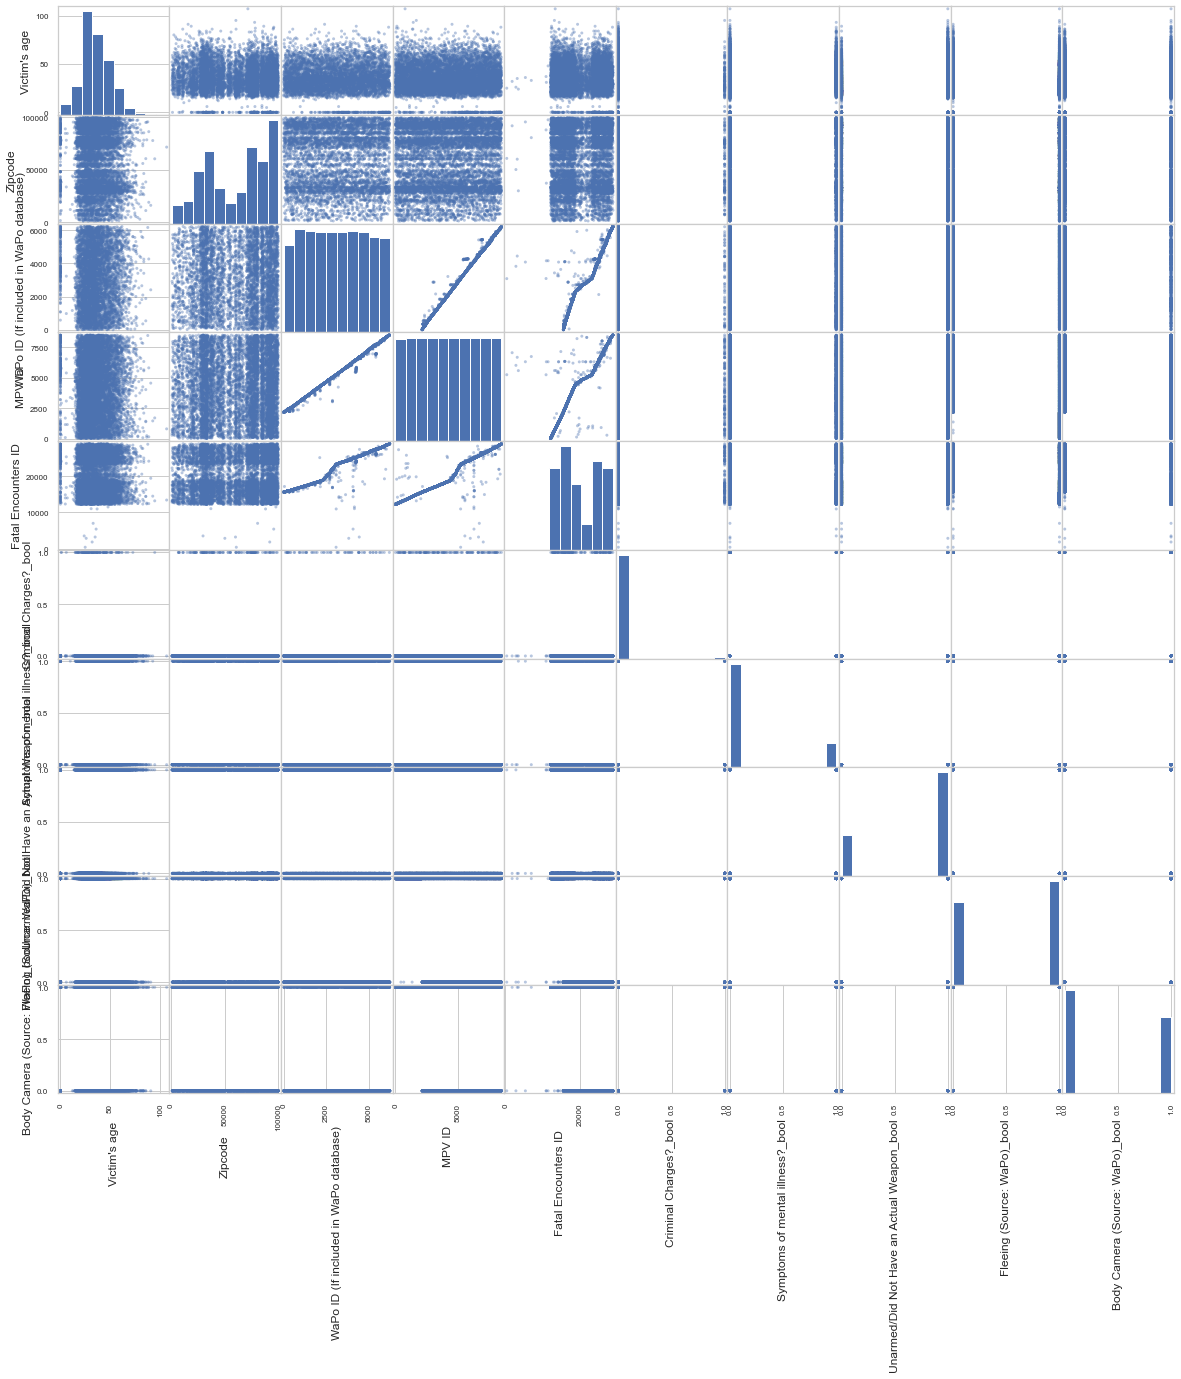

In [24]:
# check float features
grid_features = ["Victim's age", 'Zipcode', 'WaPo ID (If included in WaPo database)', 'MPV ID', 
                 'Fatal Encounters ID','Criminal Charges?_bool', 'Symptoms of mental illness?_bool',  
                 'Unarmed/Did Not Have an Actual Weapon_bool', 'Fleeing (Source: WaPo)_bool',
                 'Body Camera (Source: WaPo)_bool' ]

scatter = pd.plotting.scatter_matrix(df1[grid_features], alpha=0.4, figsize=(20,20));
for ax in scatter.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), rotation = 90)

### <div class='exercise'><b>Section 2: Now look at Washington Post Data</b></div>
[▲ Return to contents](#Contents)

<div class='exercise'>

    



</div>

In [25]:
display(data_wapo.head())
display(data_wapo.describe())

id                name        date   manner_of_death       armed   age gender race           city state  signs_of_mental_illness threat_level         flee  body_camera  longitude  latitude  is_geocoding_exact
0   3          Tim Elliot  2015-01-02              shot         gun  53.0      M    A        Shelton    WA                     True       attack  Not fleeing        False   -123.122    47.247                True
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0      M    W          Aloha    OR                    False       attack  Not fleeing        False   -122.892    45.487                True
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0      M    H        Wichita    KS                    False        other  Not fleeing        False    -97.281    37.695                True
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0      M    W  San Francisco    CA                     True       attack  Not fleeing        False   -122.422    37.763                True
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0      M    H          Evans    CO                    False       attack  Not fleeing        False   -104.692    40.384                True

id          age    longitude     latitude
count  5716.000000  5456.000000  5437.000000  5437.000000
mean   3173.216235    37.139113   -97.256366    36.650508
std    1789.492388    13.068117    16.629368     5.367021
min       3.000000     6.000000  -158.137000    19.498000
25%    1624.750000    27.000000  -112.134000    33.477000
50%    3174.500000    35.000000   -94.432000    36.100000
75%    4734.250000    46.000000   -83.066000    39.958000
max    6247.000000    91.000000   -68.014000    71.301000

In [26]:
display(data_wapo.columns)

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'], dtype='object')

In [27]:
print('Dataset shape: ', data_wapo.shape)

data_wapo.info()

Dataset shape:  (5716, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5716 entries, 0 to 5715
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5716 non-null   int64  
 1   name                     5499 non-null   object 
 2   date                     5716 non-null   object 
 3   manner_of_death          5716 non-null   object 
 4   armed                    5503 non-null   object 
 5   age                      5456 non-null   float64
 6   gender                   5715 non-null   object 
 7   race                     5109 non-null   object 
 8   city                     5716 non-null   object 
 9   state                    5716 non-null   object 
 10  signs_of_mental_illness  5716 non-null   bool   
 11  threat_level             5716 non-null   object 
 12  flee                     5426 non-null   object 
 13  body_camera              5716 non-null   bool   
 1

In [28]:
# do we have any null values?

data_wapo.isnull().values.any()

# where are they?

for col in data_wapo.columns:
    null_count = data_wapo[col].isnull().sum()
    print(col, ": ", null_count)

id :  0
name :  217
date :  0
manner_of_death :  0
armed :  213
age :  260
gender :  1
race :  607
city :  0
state :  0
signs_of_mental_illness :  0
threat_level :  0
flee :  290
body_camera :  0
longitude :  279
latitude :  279
is_geocoding_exact :  0


In [91]:
# drop some of the columns which have too many N/A or don't really help us

# not really used
df2 = data_wapo.drop('name', axis=1)


In [92]:
# Convert dae to datetime pandas value 
# https://stackoverflow.com/a/33368021/8970591
# errors=coerce -> 'if the conversion fails for any particular string then those rows are set to NaT'
# errors=raise -> then invalid parsing will raise an exception.
df2['date'] = pd.to_datetime(df2['date'], errors='raise')

Index(['id', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'], dtype='object')

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

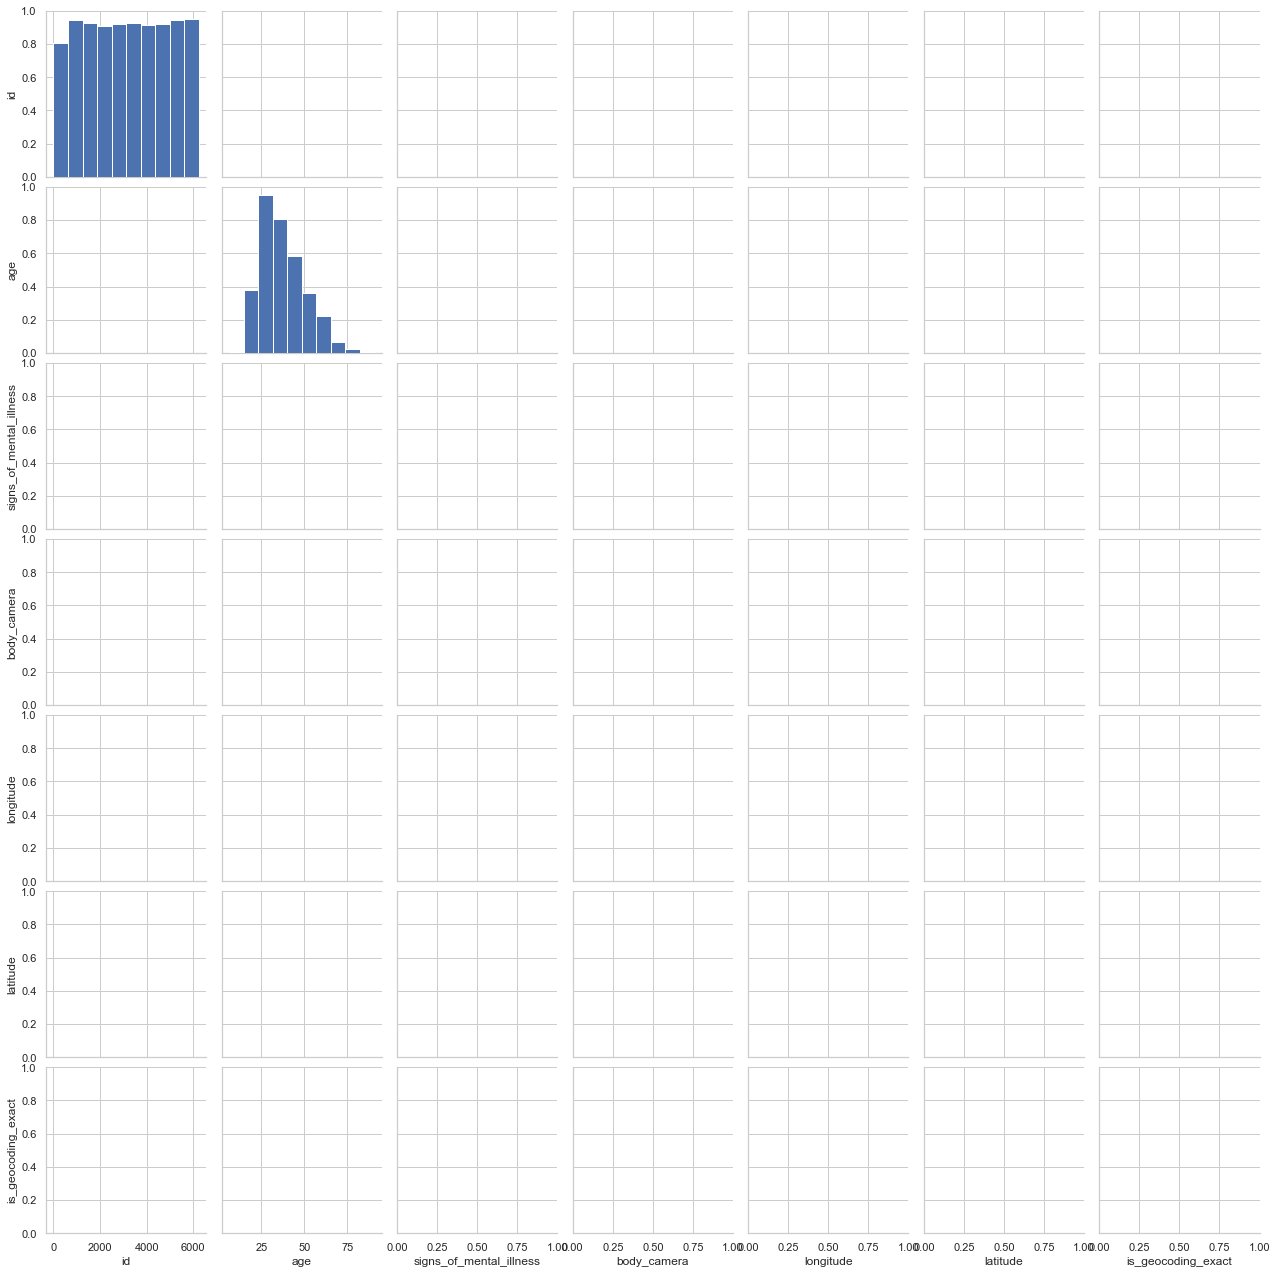

In [93]:
display(df2.columns)
sns.pairplot(data=df2)


#### Inspect data
Check value count info for all columns

In [ ]:
for col in df2.columns:
    display(df2[col].value_counts())

In [ ]:

display(df2['manner_of_death'].value_counts())

In [ ]:
pd.set_option('display.max_rows', 20)

display(df2['armed'].value_counts())
print(df2['armed'].unique())

In [ ]:
display(df2['gender'].value_counts())

In [ ]:
display(df2['threat_level'].value_counts())

#### Additional population data
We also believe that population density and classifications that could be made from this information like rural or urban cities could be important in our models. So we scraped the List of United States cities by population wikipedia page to retrieve the densities of the most densely populated cities. This wikipedia page sourced their information from the United States Census Bureau. We matched the city names from our the listed incidents of the Washington Post dataset to the population density from the scraped data and added a new Population density km2 column to our dataset.

### Reading our scraped city population data

We scraped a wikipedia entry with population densities from cities with our 100k residents. We use this to determine if our incidents happened in urban or dense areas

In [94]:
# Use the offline reverse_geopy lubrary to match cities to the coordinates
# http://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/apply-a-function-to-every-row-in-a-pandas-dataframe/
def addCityBasedOnCoordinates(row):
    # Get coordinate values
    lat, long = row['latitude'] , row['longitude']
    
    # Null check
    if str(lat) == 'nan' or str(long) == 'nan':
        # Return original city
        return row['city']
    location_info = reverse_geocode.get((lat, long))
    return location_info['city']
    

# Save the result in a new column
df2['city_lat_long'] = df2.apply(addCityBasedOnCoordinates, axis=1)

# Inspect the results
display(df2.head())

id       date   manner_of_death       armed   age gender race           city state  signs_of_mental_illness threat_level         flee  body_camera  longitude  latitude  is_geocoding_exact     city_lat_long
0   3 2015-01-02              shot         gun  53.0      M    A        Shelton    WA                     True       attack  Not fleeing        False   -123.122    47.247                True           Shelton
1   4 2015-01-02              shot         gun  47.0      M    W          Aloha    OR                    False       attack  Not fleeing        False   -122.892    45.487                True             Aloha
2   5 2015-01-03  shot and Tasered     unarmed  23.0      M    H        Wichita    KS                    False        other  Not fleeing        False    -97.281    37.695                True           Wichita
3   8 2015-01-04              shot  toy weapon  32.0      M    W  San Francisco    CA                     True       attack  Not fleeing        False   -122.422    37.763                True  Mission District
4   9 2015-01-04              shot    nail gun  39.0      M    H          Evans    CO                    False       attack  Not fleeing        False   -104.692    40.384                True             Evans

### Population density by city name
We got the population density estimates from [SimpleMaps](https://simplemaps.com/data/us-cities). They've built this dataset from the ground up using authoritative sources such as the U.S. Geological Survey and U.S. Census Bureau.
We are going to use this data to add a city population density column to each incident.

In [95]:
# Data from https://simplemaps.com/data/us-cities
city_df = pd.read_csv(f'{data_dir}/uscities-simplemaps.csv')
city_df.head()


city   city_ascii state_id  state_name  county_fips  county_name      lat       lng  population  density   source  military  incorporated             timezone  ranking                                               zips          id
0     New York     New York       NY    New York        36061     New York  40.6943  -73.9249    18713220  10715.0  polygon     False          True     America/New_York        1  11229 11226 11225 11224 11222 11221 11220 1138...  1840034016
1  Los Angeles  Los Angeles       CA  California         6037  Los Angeles  34.1139 -118.4068    12750807   3276.0  polygon     False          True  America/Los_Angeles        1  90291 90293 90292 91316 91311 90037 90031 9000...  1840020491
2      Chicago      Chicago       IL    Illinois        17031         Cook  41.8373  -87.6862     8604203   4574.0  polygon     False          True      America/Chicago        1  60018 60649 60641 60640 60643 60642 60645 6064...  1840000494
3        Miami        Miami       FL     Florida        12086   Miami-Dade  25.7839  -80.2102     6445545   5019.0  polygon     False          True     America/New_York        1  33129 33125 33126 33127 33128 33149 33144 3314...  1840015149
4       Dallas       Dallas       TX       Texas        48113       Dallas  32.7936  -96.7662     5743938   1526.0  polygon     False          True      America/Chicago        1  75287 75098 75233 75254 75251 75252 75253 7503...  1840019440

### Adding the incident's city population density 
Now that we have the original city (and sometime county) and backup city names from the coordinates, we can make the cross reference on the city population density dataset. 

In [96]:
# The average city density from each us city, needed for imputation
avg_city_dens = city_df['density'].mean()

# To store the fails for inspection
df_fails = pd.DataFrame(columns=df2.columns)

# Use the offline reverse_geopy lubrary to match cities to the coordinates
# http://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/apply-a-function-to-every-row-in-a-pandas-dataframe/
def addCityDensity(row):
    global df_fails
    
    # Grab values to match
    state = row['state']
    city = row['city']
    
    # Match based on STATE and city, because a lot of states have cities with the same name
    df_matches = city_df.loc[(city_df['state_id'] == state ) & (city_df['state_id'] == state ) & (city_df['city'] == city) ]
    
    # Try backup cities that were matched by coordinates
    if len(df_matches.index) == 0:
        city_xtra = row['city_lat_long']
        df_matches = city_df.loc[(city_df['state_id'] == state ) & (city_df['city'] == city_xtra) ]

    # Null check if no matched at all...
    if len(df_matches.index) == 0:
        # print(f"Could not match city: '{city}' or '{city_xtra}' so imputing average....")
        df_fails = df_fails.append(row, ignore_index=True)
        return avg_city_dens
    
    # Only happened once for a place in Florida and since the wsp doesn't have county, we impute the avg
    elif len(df_matches.index) > 1:
        # display(df_matches)
        mean_similar_matches = df_matches['density'].mean()
        match_cnt = len(df_matches.index)
        print(f"Multiple matches ({match_cnt}) for -> '{(city)} - {state}' so imputing their average: {round(mean_similar_matches, 2)}")
        return mean_similar_matches

    # Return first match
    return df_matches['density'].iloc[0]


# Save the result in a new column
df2['city_density'] = df2.apply(addCityDensity, axis=1)
amount_total =  len(df2.index)
amount_fail = len(df_fails.index)

# Output basic stats
print(f"\n{amount_fail} from the total of {amount_total} did not match any city name from the original cities and coordinates based cities")
print(f"So we have imputed the overal city density for them of: {round(avg_city_dens, 2)}\n")

# Inspect the new df and the rows which did not match
display(df2.head())
display(df_fails.head())

Multiple matches (3) for -> 'Midway - FL' so imputing their average: 507.67

217 from the total of 5716 did not match any city name from the original cities and coordinates based cities
So we have imputed the overal city density for them of: 515.61



id       date   manner_of_death       armed   age gender race           city state  signs_of_mental_illness threat_level         flee  body_camera  longitude  latitude  is_geocoding_exact     city_lat_long  city_density
0   3 2015-01-02              shot         gun  53.0      M    A        Shelton    WA                     True       attack  Not fleeing        False   -123.122    47.247                True           Shelton         708.0
1   4 2015-01-02              shot         gun  47.0      M    W          Aloha    OR                    False       attack  Not fleeing        False   -122.892    45.487                True             Aloha        2915.0
2   5 2015-01-03  shot and Tasered     unarmed  23.0      M    H        Wichita    KS                    False        other  Not fleeing        False    -97.281    37.695                True           Wichita         931.0
3   8 2015-01-04              shot  toy weapon  32.0      M    W  San Francisco    CA                     True       attack  Not fleeing        False   -122.422    37.763                True  Mission District        7256.0
4   9 2015-01-04              shot    nail gun  39.0      M    H          Evans    CO                    False       attack  Not fleeing        False   -104.692    40.384                True             Evans         804.0

id       date   manner_of_death         armed   age gender race        city state signs_of_mental_illness  threat_level         flee body_camera  longitude  latitude is_geocoding_exact           city_lat_long
0   98 2015-01-21              shot           gun  54.0      M    W       Derry    NH                    True        attack  Not fleeing       False    -71.337    42.908               True                 Methuen
1  136 2015-02-09              shot           gun  61.0      M    W      Smyrna    ME                    True  undetermined  Not fleeing       False    -68.104    46.159               True   Florenceville-Bristol
2  139 2015-02-10              shot           gun  49.0      M    B  Whitehaven    TN                   False        attack  Not fleeing       False    -90.054    35.025               True               Southaven
3  309 2015-03-21              shot           gun  44.0      M    W   Clarendon    NY                   False        attack          Car       False    -78.047    43.190               True       Gates-North Gates
4  234 2015-03-22  shot and Tasered  undetermined  21.0      M    B       Islip    NY                   False        attack          Car       False    -73.238    40.740               True  Setauket-East Setauket

### Adding the 'urban' classifier

We used a simple metric of a population km2 density above 2900 to be an 'urban' city. I got the idea from:
https://medium.com/codait/got-zip-code-data-prep-it-for-analytics-7022b47652d9

But we can probably make the classification more accurate or perhaps add more classes or create our own density based classes which could perhaps by good predictors for our model

In [97]:
# Add population density
# Classification from: https://medium.com/codait/got-zip-code-data-prep-it-for-analytics-7022b47652d9

# Mappping
# 2 = Urban (dens >2900)
# 1 = Suburban (100< dense < 2900)
# 0 = Rural (dens < 100)

def func(x):
    if x > 2900:
        return 'urban'
    elif 100 < x <= 2900:
        return 'suburban'
    elif x <= 100:
        return 'rural'

df2['urban'] = df2['city_density'].apply(func)

df2.head()

id       date   manner_of_death       armed   age gender race           city state  signs_of_mental_illness threat_level         flee  body_camera  longitude  latitude  is_geocoding_exact     city_lat_long  city_density     urban
0   3 2015-01-02              shot         gun  53.0      M    A        Shelton    WA                     True       attack  Not fleeing        False   -123.122    47.247                True           Shelton         708.0  suburban
1   4 2015-01-02              shot         gun  47.0      M    W          Aloha    OR                    False       attack  Not fleeing        False   -122.892    45.487                True             Aloha        2915.0     urban
2   5 2015-01-03  shot and Tasered     unarmed  23.0      M    H        Wichita    KS                    False        other  Not fleeing        False    -97.281    37.695                True           Wichita         931.0  suburban
3   8 2015-01-04              shot  toy weapon  32.0      M    W  San Francisco    CA                     True       attack  Not fleeing        False   -122.422    37.763                True  Mission District        7256.0     urban
4   9 2015-01-04              shot    nail gun  39.0      M    H          Evans    CO                    False       attack  Not fleeing        False   -104.692    40.384                True             Evans         804.0  suburban

### Adding the 'party' classifier

This project statement originated with a discussion about Black Lives Matter and other political movements. While this analysis is focuesed more on race and time distributions, the "party" classifier uses the political affiliation in different areas of the country to attempt to identify whether political viewpoints are reflected in the likelihood of police violence and the response to those events.

Used voting records over the timeframe of the data to classify by state. (Need to boil this down to County if possible)

Reference: https://www.nytimes.com/2016/08/23/upshot/50-years-of-electoral-college-maps-how-the-us-turned-red-and-blue.html


In [98]:
# Add year
df2['year'] = pd.DatetimeIndex(df2['date']).year

# which states are blue?
blue_states = {2012: ['CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'HI', 'IL', 'IA', 'ME', 'MD', 'MA', 'MI', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY', 'OH', 'OR', 'PA', 'RI', 'VT', 'VA', 'WA', 'WI'],
               2013: ['CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'HI', 'IL', 'IA', 'ME', 'MD', 'MA', 'MI', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY', 'OH', 'OR', 'PA', 'RI', 'VT', 'VA', 'WA', 'WI'],
               2014: ['CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'HI', 'IL', 'IA', 'ME', 'MD', 'MA', 'MI', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY', 'OH', 'OR', 'PA', 'RI', 'VT', 'VA', 'WA', 'WI'],
               2015: ['CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'HI', 'IL', 'IA', 'ME', 'MD', 'MA', 'MI', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY', 'OH', 'OR', 'PA', 'RI', 'VT', 'VA', 'WA', 'WI'],
               2016: ['CA', 'CO', 'CT', 'DE', 'DC', 'HI', 'IL', 'ME', 'MD', 'MA', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY', 'OR', 'RI', 'VT', 'VA', 'WA'],
               2017: ['CA', 'CO', 'CT', 'DE', 'DC', 'HI', 'IL', 'ME', 'MD', 'MA', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY', 'OR', 'RI', 'VT', 'VA', 'WA'],
               2018: ['CA', 'CO', 'CT', 'DE', 'DC', 'HI', 'IL', 'ME', 'MD', 'MA', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY', 'OR', 'RI', 'VT', 'VA', 'WA'],
               2019: ['CA', 'CO', 'CT', 'DE', 'DC', 'HI', 'IL', 'ME', 'MD', 'MA', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY', 'OR', 'RI', 'VT', 'VA', 'WA'],
               2020: ['AZ', 'CA', 'CO', 'CT', 'DE', 'DC', 'GA', 'HI', 'IL', 'ME', 'MD', 'MA', 'MI', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY', 'OR', 'PA', 'RI', 'VT', 'VA', 'WA', 'WI'] 
              }

# process
def f1(x):
    return 1 if x.State in blue_states[x.year] else 0
def f2(x):
    return 1 if x.state in blue_states[x.year] else 0

df2['party'] = df2.apply(f2, axis=1)
df1['party'] = df1.apply(f1, axis=1)

# process further
#party_df[['shootings_black', 'shootings_white', 'shootings_other', 'rate_black', 'rate_white', 'rate_other' ]] = party_df[['shootings_black', 'shootings_white', 'shootings_other', 'rate_black', 'rate_white', 'rate_other']].fillna(0)
    

display(df2.head())



id       date   manner_of_death       armed   age gender race           city state  signs_of_mental_illness threat_level         flee  body_camera  longitude  latitude  is_geocoding_exact     city_lat_long  city_density     urban  year  party
0   3 2015-01-02              shot         gun  53.0      M    A        Shelton    WA                     True       attack  Not fleeing        False   -123.122    47.247                True           Shelton         708.0  suburban  2015      1
1   4 2015-01-02              shot         gun  47.0      M    W          Aloha    OR                    False       attack  Not fleeing        False   -122.892    45.487                True             Aloha        2915.0     urban  2015      1
2   5 2015-01-03  shot and Tasered     unarmed  23.0      M    H        Wichita    KS                    False        other  Not fleeing        False    -97.281    37.695                True           Wichita         931.0  suburban  2015      0
3   8 2015-01-04              shot  toy weapon  32.0      M    W  San Francisco    CA                     True       attack  Not fleeing        False   -122.422    37.763                True  Mission District        7256.0     urban  2015      1
4   9 2015-01-04              shot    nail gun  39.0      M    H          Evans    CO                    False       attack  Not fleeing        False   -104.692    40.384                True             Evans         804.0  suburban  2015      1

Need to recast some of the object types as correct values

In [99]:
# Data type conversions
# df2['name'] = df2['name'].astype('category')
df2['manner_of_death'] = df2['manner_of_death'].astype('category')
df2['armed'] = df2['armed'].astype('str')
df2['gender'] = df2['gender'].astype('str')
df2['race'] = df2['race'].astype('str')
df2['city'] = df2['city'].astype('str')
df2['state'] = df2['state'].astype('str')
df2['threat_level'] = df2['threat_level'].astype('str')
df2['flee'] = df2['flee'].astype('str')
df2['signs_of_mental_illness'] = df2['signs_of_mental_illness'].astype('int')
df2['body_camera'] = df2['body_camera'].astype('str')
df2['is_geocoding_exact'] = df2['is_geocoding_exact'].astype('str')

# check again
df2.dtypes

id                          int64
date               datetime64[ns]
manner_of_death          category
armed                      object
age                       float64
                        ...      
city_lat_long              object
city_density              float64
urban                      object
year                        int64
party                       int64
Length: 21, dtype: object

### <div class='exercise'><b>Section 3: Make some Plots!</b></div>
[▲ Return to contents](#Contents)

<div class='exercise'>

</div>

In [100]:
def plot_value_counts_barchart(df_plot, class_key, verbose=False, normalize=False,
                               is_custom=False, custom_values=None):
    # Grab the value counts, and use custom ones if needed
    # e.g. date or categroical group
    if is_custom:
        df_values = custom_values
    else:
        df_values = df_plot[class_key].value_counts(normalize=normalize)
    
    if verbose:
        display(df_values)
    
    # Create the plot ax object
    ax = df_values.plot(kind='bar', figsize=(14,8))
    
    # Set and rotate the labels for better readability 
#     ax.set_xticklabels(preds, rotation=45, direction="in", rotation_mode="anchor")
    ax.tick_params(axis='x', rotation=45, direction="in",)
    
    # Set the labels
    ax.set_xlabel(class_key.capitalize(), fontsize=15)
    ax.set_ylabel("Frequency", fontsize=15)
    
    # Create the title extenstion and then set title
    title_ext_norm = " - Normalized" if normalize == True else ""
    ax.set_title(f"Incident frequency by {class_key.capitalize()}{title_ext_norm}", fontsize=18)
    
    plt.show()

### State by state 
We see that CA, TX and FL by far have the most police indcident. If you look at the normalized (so by ratio), chart you see an even bigger.

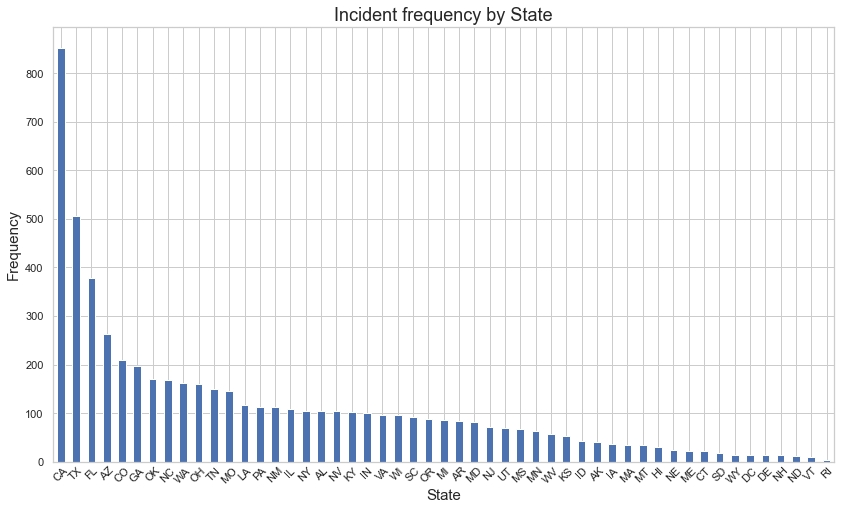

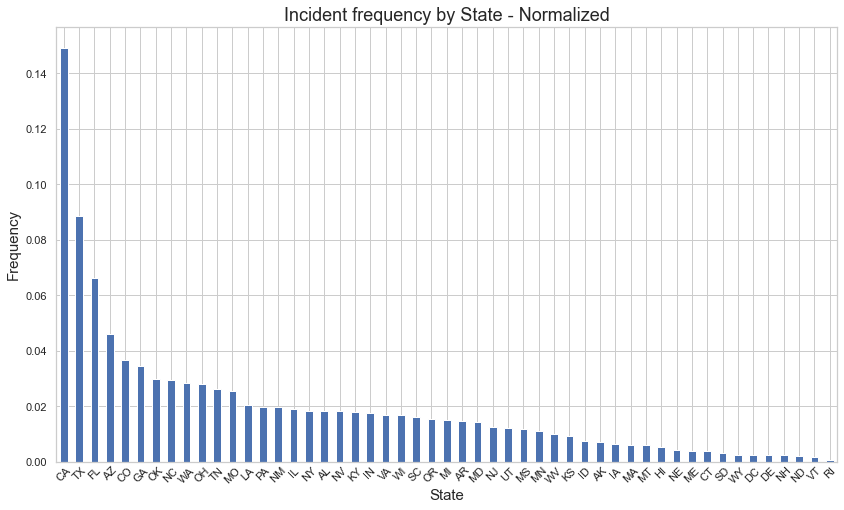

In [101]:
# WSP: Get incident state counts
per_state_df = df2.groupby(["state"])

# Plot state by state count 
plot_value_counts_barchart(df2, 'state', verbose=False, normalize=False)

# Plot state by state count 
plot_value_counts_barchart(df2, 'state', verbose=False, normalize=True)

In [102]:
# Get the population of each state from the 2019 Cencus data
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
population_summary = population_df[population_df['STATE']!=0][['NAME','POPESTIMATE2019']]
population_summary['abbrev'] = population_summary['NAME'].map(us_state_abbrev)
population_summary.set_index('abbrev',inplace=True)

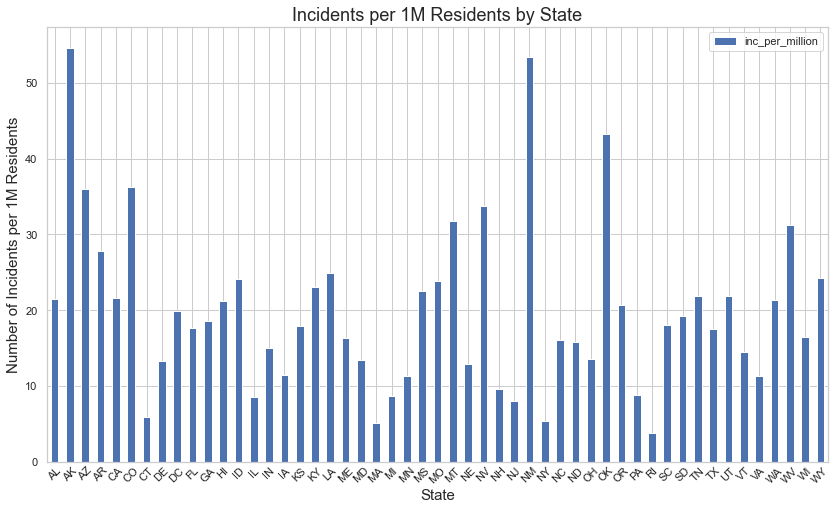

In [103]:
state_df= pd.concat([population_summary,df2['state'].groupby([df2.state]).agg('count')],axis=1).drop(index='PR')
state_df['inc_per_million'] = state_df['state']/state_df['POPESTIMATE2019']*1000000
ax = state_df.drop(columns=['NAME','POPESTIMATE2019','state']).plot(kind='bar', figsize=(14,8))
ax.tick_params(axis='x', rotation=45, direction="in",)
ax.set_xlabel("State", fontsize=15)
ax.set_ylabel("Number of Incidents per 1M Residents", fontsize=15)
ax.set_title("Incidents per 1M Residents by State", fontsize=18)
plt.show()

### Year by year for all incidents
There doesn't seem to be a very clear indication that the indicents grew on year to year basis 

This data was sourced at the 10th month of 2020, so 2020 could at the end of this year also be similar to the previous years

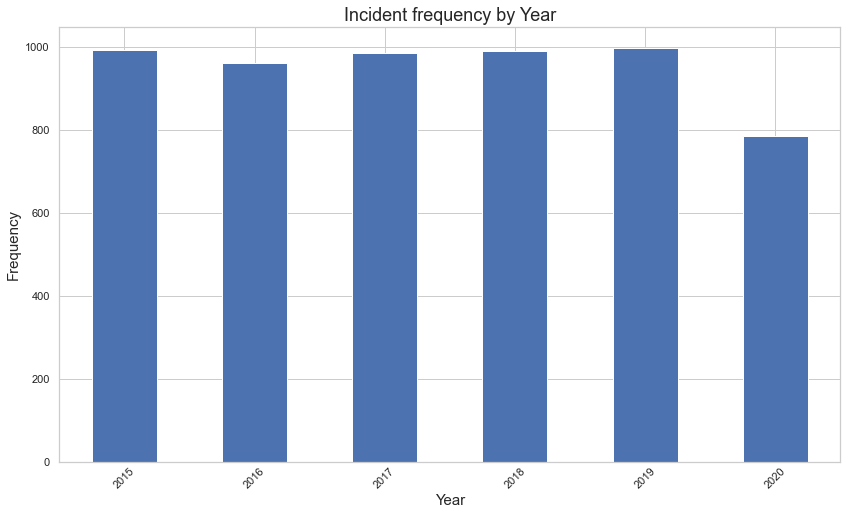

In [104]:
# Plot state by year 
df_by_year = df2['date'].groupby([df2.date.dt.year]).agg('count')
plot_value_counts_barchart(df2, 'year', is_custom=True, custom_values=df_by_year)

### Incidents by race

This is the [original classification](https://github.com/washingtonpost/data-police-shootings):
race:

`race`:
- `W`: White, non-Hispanic
- `B`: Black, non-Hispanic
- `A`: Asian
- `N`: Native American
- `H`: Hispanic
- `O`: Other
- `None`: unknown

We want add weights the incident based on the actual amount of each race that lives in the US.

Used data [from wikipedia](https://en.wikipedia.org/wiki/Race_and_ethnicity_in_the_United_States#Racial_categories):
- `W`: 0.601
- `B`: 0.134
- `A`: 0.059
- `N`: 0.013
- `H`: 0.185
- `O`: 0.008

W      2595
B      1345
H       947
nan     607
A        94
Name: race, dtype: int64

A    0.000481
B    0.003032
H    0.001546
N    0.001882
O    0.001775
dtype: float64

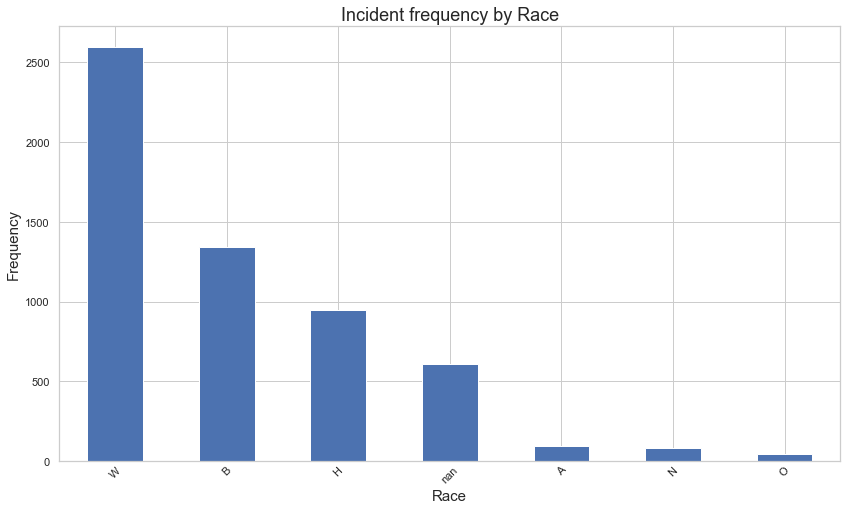

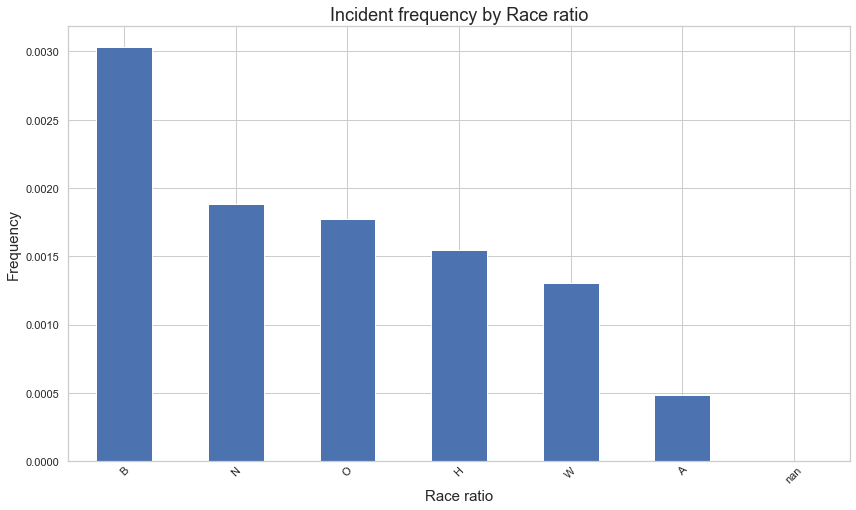

In [105]:
# Get weighted values
df_by_race = df2['race'].value_counts()
display(df_by_race.head())

# https://www.worldometers.info/world-population/us-population
total_pop = 331002651

# Add the weighted race values from wikipedia x populatio
race_ratios = pd.Series({
    'W': 0.601,
    'B': 0.134,
    'A': 0.059,
    'N': 0.013,
    'H': 0.185,
    'O': 0.008,
}) * total_pop

# print(race_ratios)

# Divide the indicent counts by their representation amount 
df_by_race_ratio = (df_by_race/race_ratios) * 100
display(df_by_race_ratio.head())


# Plot state by race
plot_value_counts_barchart(df2, 'race')

# Indicent plot by ratio race in US 
df_by_race_ratio.sort_values(ascending=False, inplace=True)
plot_value_counts_barchart(df2, 'Race ratio', is_custom=True, custom_values=df_by_race_ratio)



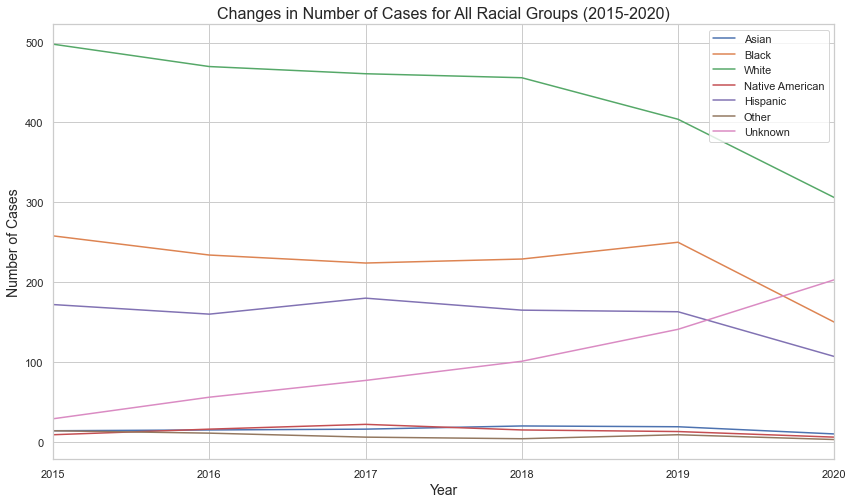

In [106]:
race_year_df = df2.groupby(['race','year'], as_index=False).count()
plt.figure(figsize=(14,8))
plt.plot(race_year_df[race_year_df['race']=='A']['year'],race_year_df[race_year_df['race']=='A']['id'], label='Asian')
plt.plot(race_year_df[race_year_df['race']=='B']['year'],race_year_df[race_year_df['race']=='B']['id'], label='Black')
plt.plot(race_year_df[race_year_df['race']=='W']['year'],race_year_df[race_year_df['race']=='W']['id'], label='White')
plt.plot(race_year_df[race_year_df['race']=='N']['year'],race_year_df[race_year_df['race']=='N']['id'], label='Native American')
plt.plot(race_year_df[race_year_df['race']=='H']['year'],race_year_df[race_year_df['race']=='H']['id'], label='Hispanic')
plt.plot(race_year_df[race_year_df['race']=='O']['year'],race_year_df[race_year_df['race']=='O']['id'], label='Other')
plt.plot(race_year_df[race_year_df['race']=='nan']['year'],race_year_df[race_year_df['race']=='nan']['id'], label='Unknown')
plt.xlim(2015,2020)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Cases", fontsize=14)
plt.title("Changes in Number of Cases for All Racial Groups (2015-2020)", fontsize=16)
plt.legend()
plt.show()

### Incidents by age


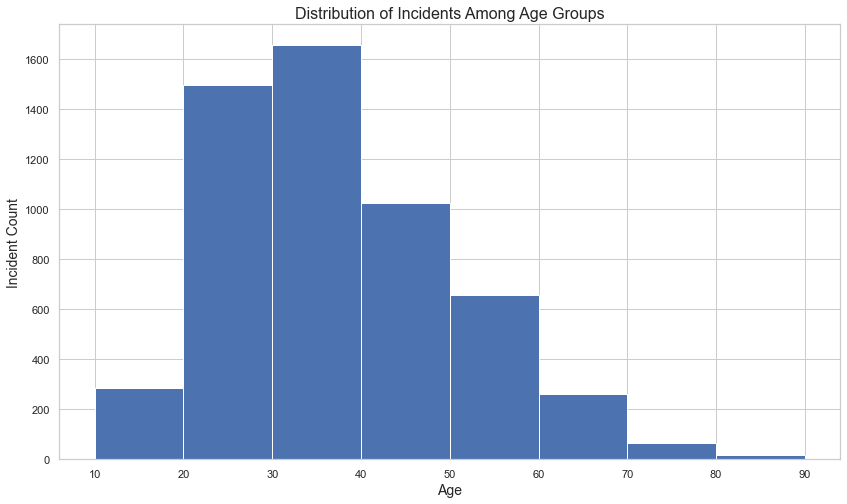

In [107]:
plt.figure(figsize=(14,8))
plt.hist(df2['age'],bins=range(10,100,10))
plt.xlabel("Age", fontsize=14)
plt.ylabel("Incident Count", fontsize=14)
plt.title("Distribution of Incidents Among Age Groups", fontsize=16)
plt.show()


### Creating a mapped visualzation


#### The state of our visualizations
We create a US map so we can better inspect where these indicents occur. We only just started working with geopandas and all it's required depencies, so our visualizations are not that great yet. We do however plan to make more specific state based visualizations, which we can use to inspect where incidents most occur and determine is a precictor like 'urban' can be of importance.

#### Imputing missing coordinates
We miss about 600 latitude and longituge points from are dataset, which you can see in this notebook. So for now we did not use the rows with missing coordinates. We do however plan to impute these coordinates by the coordinates we can cross reference from each corresponding city. This means we'll have can reduce these 600 missing coordinates to 0, since no incident has a missing value for city. We plan to use [geopy](https://geopy.readthedocs.io/en/stable/) for this.

In [108]:
# Right way to install geopands in existing conda env
# Had to do it with pip, alse needed pip install descartes
# https://stackoverflow.com/questions/34427788/how-to-successfully-install-pyproj-and-geopandas
import geopandas

# Create a new df withouth the rows that miss the required rows for mapping
df_wsp_coord_cleared = df2[df2.longitude.notnull()]

# A GeoDataFrame needs a shapely object. We use geopandas points_from_xy()
# to transform Longitude and Latitude into a list of shapely.Point
gdf = geopandas.GeoDataFrame(df_wsp_coord_cleared,
                             geometry=geopandas.points_from_xy(df_wsp_coord_cleared.longitude,
                                                               df_wsp_coord_cleared.latitude))
# Output the results for inspection
display(gdf.head())

id       date   manner_of_death       armed   age gender race           city state  signs_of_mental_illness threat_level         flee body_camera  longitude  latitude is_geocoding_exact     city_lat_long  city_density     urban  year  party                     geometry
0   3 2015-01-02              shot         gun  53.0      M    A        Shelton    WA                        1       attack  Not fleeing       False   -123.122    47.247               True           Shelton         708.0  suburban  2015      1  POINT (-123.12200 47.24700)
1   4 2015-01-02              shot         gun  47.0      M    W          Aloha    OR                        0       attack  Not fleeing       False   -122.892    45.487               True             Aloha        2915.0     urban  2015      1  POINT (-122.89200 45.48700)
2   5 2015-01-03  shot and Tasered     unarmed  23.0      M    H        Wichita    KS                        0        other  Not fleeing       False    -97.281    37.695               True           Wichita         931.0  suburban  2015      0   POINT (-97.28100 37.69500)
3   8 2015-01-04              shot  toy weapon  32.0      M    W  San Francisco    CA                        1       attack  Not fleeing       False   -122.422    37.763               True  Mission District        7256.0     urban  2015      1  POINT (-122.42200 37.76300)
4   9 2015-01-04              shot    nail gun  39.0      M    H          Evans    CO                        0       attack  Not fleeing       False   -104.692    40.384               True             Evans         804.0  suburban  2015      1  POINT (-104.69200 40.38400)

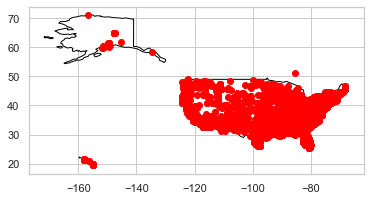

In [109]:
# Docs:https://geopandas.org/gallery/create_geopandas_from_pandas.html
# Other source:https://jcutrer.com/python/learn-geopandas-plotting-usmaps
# https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
# Get the dataset for the naturalearth_lowres
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to US.
ax = world[world.name == "United States of America"].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

# Output our first simple US map
plt.show()

#### Additional Investigative visualizations

Variety of plots attempting to gain further insights into the data


Index(['id', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact', 'city_lat_long', 'city_density', 'urban', 'year', 'party'], dtype='object')


<AxesSubplot:xlabel='flee'>

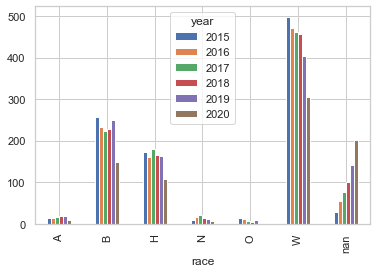

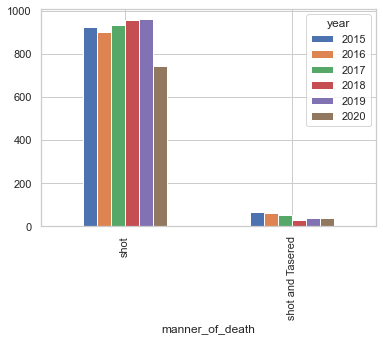

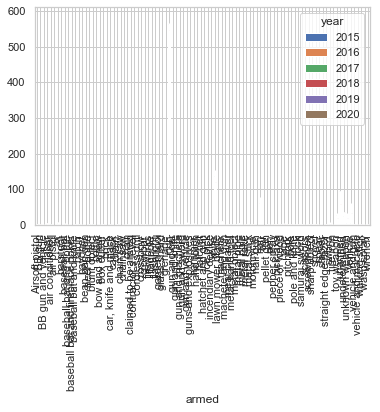

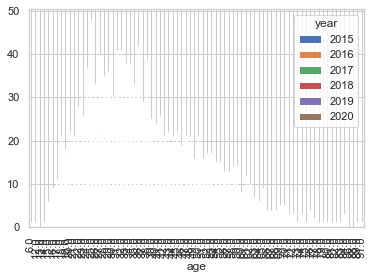

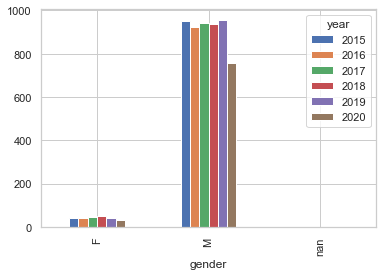

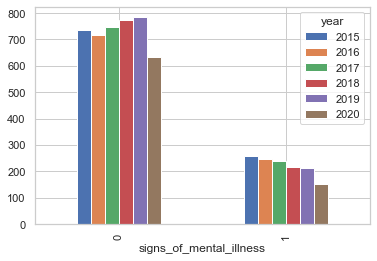

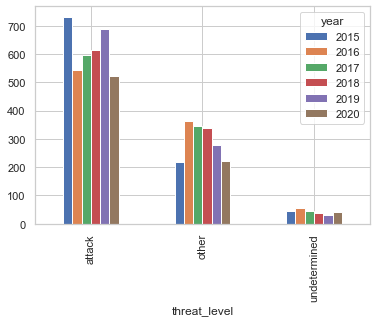

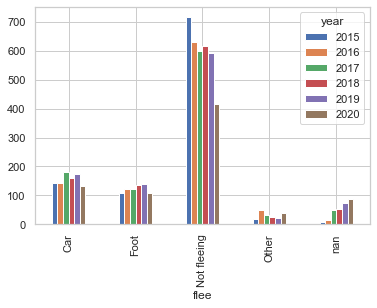

In [110]:
# your code here
print(df2.columns)

df2.groupby('year').race.value_counts().unstack(0).plot.bar()
df2.groupby('year').manner_of_death.value_counts().unstack(0).plot.bar()
df2.groupby('year').armed.value_counts().unstack(0).plot.bar()
df2.groupby('year').age.value_counts().unstack(0).plot.bar()
df2.groupby('year').gender.value_counts().unstack(0).plot.bar()
df2.groupby('year').signs_of_mental_illness.value_counts().unstack(0).plot.bar()
df2.groupby('year').threat_level.value_counts().unstack(0).plot.bar()
df2.groupby('year').flee.value_counts().unstack(0).plot.bar()

Index(['Victim's age', 'Victim's gender', 'Victim's race', 'Date of Incident (month/day/year)', 'City', 'State', 'Zipcode', 'County', 'Agency responsible for death', 'Cause of death', 'Official disposition of death (justified or other)', 'Criminal Charges?', 'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon', 'Alleged Weapon', 'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)', 'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)', 'geography', 'MPV ID', 'Fatal Encounters ID', 'Criminal Charges?_bool', 'Symptoms of mental illness?_bool', 'Unarmed/Did Not Have an Actual Weapon_bool', 'Fleeing (Source: WaPo)_bool', 'Body Camera (Source: WaPo)_bool', 'year', 'party'], dtype='object')


<AxesSubplot:xlabel='Fleeing (Source: WaPo)'>

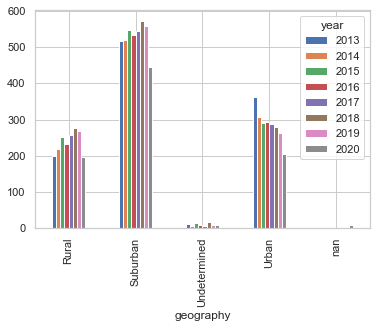

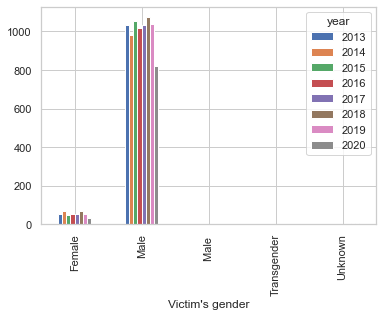

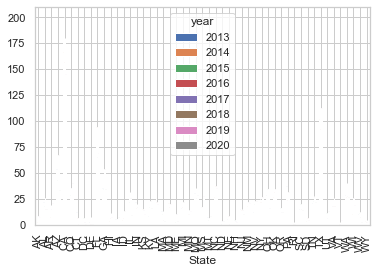

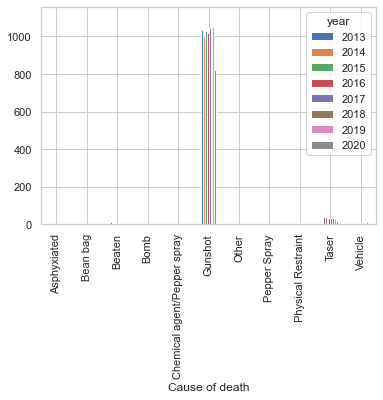

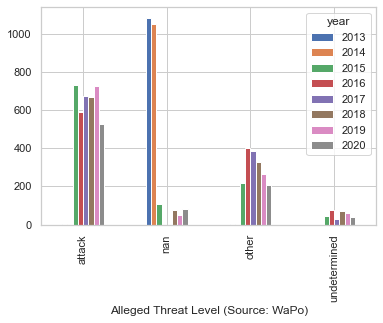

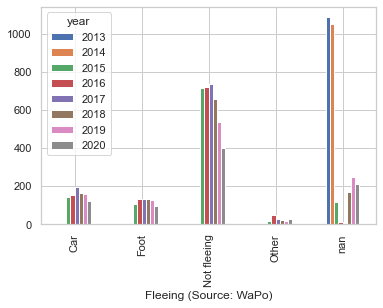

In [111]:
# your code here

print(df1.columns)
# More groupings 
df1.groupby('year').geography.value_counts().unstack(0).plot.bar()
df1.groupby('year')["Victim's gender"].value_counts().unstack(0).plot.bar()
df1.groupby('year')["State"].value_counts().unstack(0).plot.bar()
df1.groupby('year')["Cause of death"].value_counts().unstack(0).plot.bar()
df1.groupby('year')["Alleged Threat Level (Source: WaPo)"].value_counts().unstack(0).plot.bar()
df1.groupby('year')["Fleeing (Source: WaPo)"].value_counts().unstack(0).plot.bar()


<AxesSubplot:>

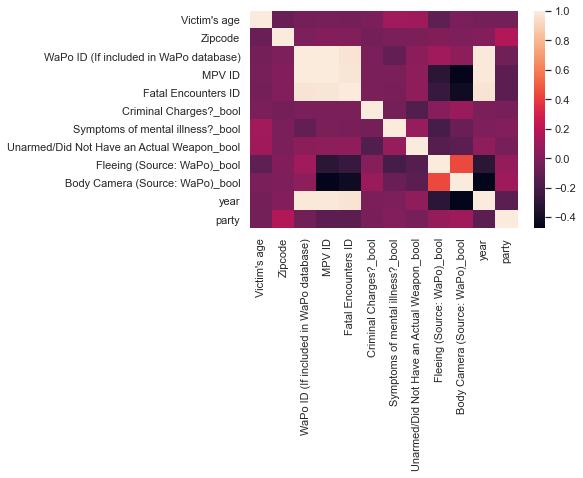

In [112]:
# your code here

# Calculate correlations
corr = df1.corr()
 
# Heatmap
sns.heatmap(corr)

<AxesSubplot:>

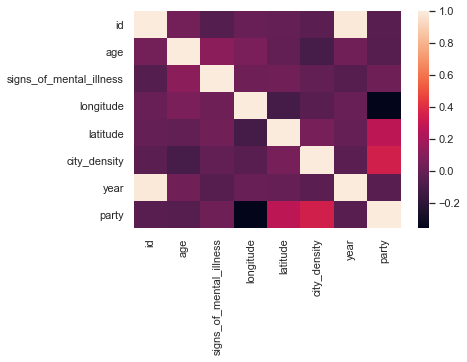

In [113]:
# your code here

# Calculate correlations
corr = df2.corr()
 
# Heatmap
sns.heatmap(corr)


### <div class='exercise'><b>Section 4: Initial Look at Models</b></div>
[▲ Return to contents](#Contents)

<div class='exercise'>

</div>



*This initial look at the models explores the regression specification for Modified Question #2, evaluated by racial category of police shooting victim*

### Check full null values on row level and cell level

In [120]:
# Custom function to get nan stats for empty rows
def nan_row_stats(df_missing):
    # Get the rows with all null values
    idx = df_missing.index[df_missing.isnull().all(1)]
    nans = df_missing.iloc[idx]
    if len(nans) > 1:
        print("Dataframe has rows with each column value being empty")
        display(nans)
    else:
        print(f"Dataframe with {len(df_missing)} rows, does not have rows with all empty values")
        
# Custom function to get nan stats for values
def nan_vals_stats(df_missing, show_summary=False, show_rows=False):
    # Get the missing values per each column 
    missing_series = df_missing.isna().sum()

    # Concatunate each column's type so we have a better idea for imputation
    missing_types_df = pd.concat([missing_series.rename('Missing'), df_missing.dtypes.rename('Dtype')], axis=1)
    missing_types_df.sort_values(by=['Missing'], ascending=False, inplace=True)
    display(missing_types_df)
    
    # Get the column names where values are missing
    missing_colnames = missing_types_df[missing_types_df['Missing']>0].index.tolist()
    
    if len(missing_colnames) > 0:
        # Output missing column's stats for imputaiton 
        if show_summary:
            # Get the basic information of our missing columns
            display(df_missing[missing_colnames].describe())

        # Also output missing rows, needed to determine adequate imputation method
        if show_rows:
            null_data_df = df_missing[df_missing.isnull().any(axis=1)]
            display(null_data_df)
        
    return missing_colnames

In [121]:
# Output the nan stats with my custom function
nan_row_stats(df2)
missing_cols = nan_vals_stats(df2, True, True)


Dataframe with 5716 rows, does not have rows with all empty values


Missing     Dtype
latitude             279   float64
longitude            279   float64
age                  260   float64
id                     0     int64
flee                   0    object
...                  ...       ...
race                   0    object
gender                 0    object
armed                  0    object
manner_of_death        0  category
party                  0     int64

[21 rows x 2 columns]

latitude    longitude          age
count  5437.000000  5437.000000  5456.000000
mean     36.650508   -97.256366    37.139113
std       5.367021    16.629368    13.068117
min      19.498000  -158.137000     6.000000
25%      33.477000  -112.134000    27.000000
50%      36.100000   -94.432000    35.000000
75%      39.958000   -83.066000    46.000000
max      71.301000   -68.014000    91.000000

id       date manner_of_death  armed  age gender race               city state  signs_of_mental_illness  threat_level         flee body_camera  longitude  latitude is_geocoding_exact      city_lat_long  city_density     urban  year  party
127    584 2015-02-20            shot    gun  NaN      M    H            Houston    TX                        0        attack          Car       False    -95.401    29.983               True             Aldine   1399.000000  suburban  2015      0
658    789 2015-08-29            shot  knife  NaN      M    W        San Antonio    TX                        0         other  Not fleeing       False    -98.616    29.554               True            Helotes   1231.000000  suburban  2015      0
707    839 2015-09-17            shot    gun  NaN      M    W           Brodhead    KY                        0        attack  Not fleeing       False    -84.419    37.386               True           Brodhead    261.000000  suburban  2015      0
769    908 2015-10-12            shot    gun  NaN      M    B             Lawton    OK                        0        attack  Not fleeing       False    -98.422    34.599               True             Lawton    441.000000  suburban  2015      0
809   1283 2015-10-24            shot    gun  NaN      M  nan          New Paltz    NY                        0        attack  Not fleeing       False    -74.080    41.747               True  Rosendale Village    515.613848  suburban  2015      1
...    ...        ...             ...    ...  ...    ...  ...                ...   ...                      ...           ...          ...         ...        ...       ...                ...                ...           ...       ...   ...    ...
5703  6234 2020-10-16            shot    gun  NaN      M  nan        Sioux Falls    IA                        0  undetermined  Not fleeing       False    -96.756    43.556               True        Sioux Falls    515.613848  suburban  2020      0
5707  6235 2020-10-17            shot    gun  NaN      M  nan             Laguna    NM                        0        attack          Car       False   -107.380    35.032               True             Laguna     40.000000     rural  2020      1
5708  6236 2020-10-17            shot    nan  NaN      M  nan  Muhlenberg County    KY                        1         other  Not fleeing       False    -87.142    37.177               True         Greenville    316.000000  suburban  2020      0
5710  6233 2020-10-18            shot    gun  NaN      M  nan            Sunrise    FL                        1        attack  Not fleeing       False    -80.329    26.134               True  Pine Island Ridge   2270.000000  suburban  2020      0
5715  6244 2020-10-19            shot    gun  NaN      M  nan         Emmitsburg    MD                        0        attack        Other       False    -79.677    34.609               True      Bennettsville    821.000000  suburban  2020      1

[518 rows x 21 columns]

### Drop the null values

In [122]:
# where are they?
for col in df2.columns:
    null_count = df2[col].isnull().sum()
    print(col, ": ", null_count)
    
# Only a few missing values, lets drop those
df2 = df2.dropna()
print("\n\nModified dataframe shape after dropping NaN:")
display(df2.shape)

id :  0
date :  0
manner_of_death :  0
armed :  0
age :  260
gender :  0
race :  0
city :  0
state :  0
signs_of_mental_illness :  0
threat_level :  0
flee :  0
body_camera :  0
longitude :  279
latitude :  279
is_geocoding_exact :  0
city_lat_long :  0
city_density :  0
urban :  0
year :  0
party :  0


Modified dataframe shape after dropping NaN:


(5198, 21)

### Processing the data for our model




In [123]:
# Custom one hot encoding function for non numerical columns/features
def one_hot_encode(df_one_hot, cols, drop_orig = False, force_lc = False, output_stats = True):
    encoded_cols_added = 0
    amount_cols_before = len(df_one_hot.columns)
    
    for col in cols:
        dummies = pd.get_dummies(df_one_hot[col], prefix=col)
        print(f"Predictor '{col}' has {len(dummies.columns)} categories added")
        df_one_hot = pd.concat([df_one_hot, dummies], axis=1)
        encoded_cols_added += len(dummies.columns)
    
    # Drop original columns
    if drop_orig:
        df_one_hot = df_one_hot.drop(cols, axis=1)
    
    # Output changes made
    if output_stats:
        print(f"Dropped original -> {drop_orig}")
        print(f"Added {encoded_cols_added} one hot encoded cols.")
        print(f"Started with {amount_cols_before} to a total of {len(df_one_hot.columns)} columns")
    
    # Lowercase all columns if required
    if force_lc:
        df_one_hot.columns= df_one_hot.columns.str.lower()
    
    return df_one_hot

In [138]:
display(df2.info())
display(df2.describe())
display(df2.head())
display(df2.signs_of_mental_illness.value_counts())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5198 entries, 0 to 5714
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       5198 non-null   int64         
 1   date                     5198 non-null   datetime64[ns]
 2   manner_of_death          5198 non-null   category      
 3   armed                    5198 non-null   object        
 4   age                      5198 non-null   float64       
 5   gender                   5198 non-null   object        
 6   race                     5198 non-null   object        
 7   city                     5198 non-null   object        
 8   state                    5198 non-null   object        
 9   signs_of_mental_illness  5198 non-null   int64         
 10  threat_level             5198 non-null   object        
 11  flee                     5198 non-null   object        
 12  body_camera              5198 non-

None

id          age  signs_of_mental_illness    longitude     latitude  city_density         year        party
count  5198.000000  5198.000000              5198.000000  5198.000000  5198.000000   5198.000000  5198.000000  5198.000000
mean   3066.196229    37.096768                 0.236245   -97.072983    36.723067   1225.605197  2017.324356     0.433436
std    1787.909412    13.078355                 0.424815    16.635064     5.377591   1362.573498     1.668687     0.495597
min       3.000000     6.000000                 0.000000  -158.137000    19.498000      1.000000  2015.000000     0.000000
25%    1501.250000    27.000000                 0.000000  -112.072000    33.488000    474.000000  2016.000000     0.000000
50%    3016.500000    35.000000                 0.000000   -94.131000    36.159000    874.000000  2017.000000     0.000000
75%    4615.750000    46.000000                 0.000000   -82.985500    40.013000   1466.000000  2019.000000     1.000000
max    6247.000000    91.000000                 1.000000   -68.014000    71.301000  14221.000000  2020.000000     1.000000

id       date   manner_of_death       armed   age gender race           city state  signs_of_mental_illness threat_level         flee body_camera  longitude  latitude is_geocoding_exact     city_lat_long  city_density     urban  year  party
0   3 2015-01-02              shot         gun  53.0      M    A        Shelton    WA                        1       attack  Not fleeing       False   -123.122    47.247               True           Shelton         708.0  suburban  2015      1
1   4 2015-01-02              shot         gun  47.0      M    W          Aloha    OR                        0       attack  Not fleeing       False   -122.892    45.487               True             Aloha        2915.0     urban  2015      1
2   5 2015-01-03  shot and Tasered     unarmed  23.0      M    H        Wichita    KS                        0        other  Not fleeing       False    -97.281    37.695               True           Wichita         931.0  suburban  2015      0
3   8 2015-01-04              shot  toy weapon  32.0      M    W  San Francisco    CA                        1       attack  Not fleeing       False   -122.422    37.763               True  Mission District        7256.0     urban  2015      1
4   9 2015-01-04              shot    nail gun  39.0      M    H          Evans    CO                        0       attack  Not fleeing       False   -104.692    40.384               True             Evans         804.0  suburban  2015      1

0    3970
1    1228
Name: signs_of_mental_illness, dtype: int64

### Creating a new predictor from 'armed'
As we can see armed has a lot of different options, which make it hard to make a good distinction between persons unarmed or armed. So we create a new predictor for armed, unarmed or undetermined.

In [137]:
# Check all options
display(df2.armed.value_counts())






gun                2942
knife               766
unarmed             341
nan                 197
toy weapon          183
                   ... 
wasp spray            1
bayonet               1
bottle                1
metal rake            1
air conditioner       1
Name: armed, Length: 94, dtype: int64

### Dropping columns (before encoding)

#### city & city_lat_long
We are dropping the city variable city since this has more than 1000 different values/categories. We instead use the city density and the urban/rural classifiers we created from matching the cities

#### is_geocoding_exact & coordinates
We only have 6 true values for this predictor, where only 1 of those did use a county name instead of a city name when we matched the density. Meaning that the other 5 non exact geocoding indicendts were actually geocoded by their city, just like all the other indcidents


In [128]:
# Columns to drop
drop_cols = ['city', 'city_lat_long', 'longitude', 'latitude', 'is_geocoding_exact']
encoded_df = df2.drop(columns=drop_cols)
encoded_df.head()


array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'nan',
       'shovel', 'vehicle', 'hammer', 'hatchet', 'sword', 'machete',
       'box cutter', 'undetermined', 'metal object', 'screwdriver',
       'lawn mower blade', 'flagpole', 'guns and explosives',
       'cordless drill', 'crossbow', 'metal pole', 'Taser', 'metal pipe',
       'metal hand tool', 'blunt object', 'metal stick', 'sharp object',
       'meat cleaver', 'carjack', 'chain', "contractor's level",
       'unknown weapon', 'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'spear', 'chair', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'glass shard', 'motorcycle',
       'pepper spray', 'metal rake', 'baton', 'crowbar', 'oar',
       'machete and gun', 'air conditioner', '

### One-hot-encoding and dropping original

In [129]:
# Categorical variables to process
cat_vars = ['manner_of_death','armed', 'gender', 'race', 
            'state', 'threat_level', 'flee', 'body_camera', 'urban']


# Enocde all the data
encoded_df = one_hot_encode(encoded_df, cat_vars,
                                     drop_orig = True, force_lc = True)

# Validate data mutation and output the rest
display(encoded_df.head())
# display(all_data_encoded_df.info())
# display(all_data_encoded_df.describe())





Predictor 'manner_of_death' has 2 categories added
Predictor 'armed' has 94 categories added
Predictor 'gender' has 2 categories added
Predictor 'race' has 7 categories added
Predictor 'state' has 51 categories added
Predictor 'threat_level' has 3 categories added
Predictor 'flee' has 5 categories added
Predictor 'body_camera' has 2 categories added
Predictor 'urban' has 3 categories added
Dropped original -> True
Added 169 one hot encoded cols.
Started with 16 to a total of 176 columns


id       date   age  signs_of_mental_illness  city_density  year  party  manner_of_death_shot  manner_of_death_shot and tasered  armed_airsoft pistol  armed_bb gun  armed_bb gun and vehicle  armed_taser  armed_air conditioner  armed_air pistol  armed_ax  armed_barstool  armed_baseball bat  armed_baseball bat and bottle  armed_baseball bat and fireplace poker  armed_baton  armed_bayonet  armed_bean-bag gun  armed_beer bottle  armed_blunt object  armed_bottle  armed_bow and arrow  armed_box cutter  armed_brick  armed_carjack  armed_chain  armed_chain saw  armed_chainsaw  armed_chair  armed_claimed to be armed  armed_contractor's level  armed_cordless drill  armed_crossbow  armed_crowbar  armed_fireworks  armed_flagpole  armed_flashlight  armed_garden tool  armed_glass shard  armed_grenade  armed_gun  armed_gun and car  armed_gun and knife  armed_gun and machete  armed_gun and sword  ...  state_il  state_in  state_ks  state_ky  state_la  state_ma  state_md  state_me  state_mi  state_mn  state_mo  state_ms  state_mt  state_nc  state_nd  state_ne  state_nh  state_nj  state_nm  state_nv  state_ny  state_oh  state_ok  state_or  state_pa  state_ri  state_sc  state_sd  state_tn  state_tx  state_ut  state_va  state_vt  state_wa  state_wi  state_wv  state_wy  threat_level_attack  threat_level_other  threat_level_undetermined  flee_car  flee_foot  flee_not fleeing  flee_other  flee_nan  body_camera_false  body_camera_true  urban_rural  urban_suburban  urban_urban
0   3 2015-01-02  53.0                        1         708.0  2015      1                     1                                 0                     0             0                         0            0                      0                 0         0               0                   0                              0                                       0            0              0                   0                  0                   0             0                    0                 0            0              0            0                0               0            0                          0                         0                     0               0              0                0               0                 0                  0                  0              0          1                  0                    0                      0                    0  ...         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         1         0         0         0                    1                   0                          0         0          0                 1           0         0                  1                 0            0               1            0
1   4 2015-01-02  47.0                        0        2915.0  2015      1                     1                                 0                     0             0                         0            0                      0                 0         0               0                   0                              0                                       0            0              0                   0                  0                   0             0                    0                 0            0              0            0                0               0            0                          0                         0                     0               0              0                0               0                 0                  0                  0              0          1                  0                    0                      0                    0  ...         0         0         0         0         0         0         0         0         0         0         0         0         0         0     

### Now let's see which predictors are most correlated to race

In [134]:
# Get the column names
display(encoded_df.filter(regex='^race_*',axis=1).columns)


Index(['race_a', 'race_b', 'race_h', 'race_n', 'race_o', 'race_w', 'race_nan'], dtype='object')

In [133]:
# Create subsets based on race
race_w_df = encoded_df[encoded_df['race_w'] == 1]
race_aa_df = encoded_df[encoded_df['race_a'] == 1]
# train_h = X_train_raw[X_train_raw['race_hispanic'] == 1]
# train_na = X_train_raw[X_train_raw['race_native american'] == 1]
# train_as = X_train_raw[X_train_raw['race_asian'] == 1]

# Create the non-causasian and non-african-american susbet
race_other_df = encoded_df[(encoded_df['race_w'] == 0) & (encoded_df['race_a'] == 0)]

In [135]:
def plot_pred_density_per_race(pred_names, race_dfs, main_name="Race based"):
    amount_rows = int(np.ceil(len(pred_names)/2))

    # Grab the figure and ax arr object
    fig, axs = plt.subplots(nrows=amount_rows,ncols=2,figsize=(20,20)) 
    axs = axs.ravel() # Get them in a listed order

    # Iterate through the five airlines
    # Loop through the dfs
    # Loop through each pred we want to plot per group
    for i in range(len(pred_names)):
        pred = pred_names[i]    

        # Loop through each pred we want to plot per group
        for race, race_df in race_dfs.items():

            # Subset to the pred we want to plot for this race
            preds_plot = race_df[pred]
            # print(f"Plotting {pred} for {race}....")
            
            # axs[i].hist(preds_plot.values, histtype='stepfilled', alpha=0.3,
            # density=True, bins=40, label=race)

            # Draw the density plot
            sns.distplot(preds_plot, hist = False, kde = True,
                         kde_kws = {'bw': 0.5, 'shade': True,'linewidth': 3},
                         label = race, ax=axs[i])


        # Format and set the y label
        x_name_formatted = pred.replace('_', ' ').title()

        # Set plot info
        axs[i].set_xlabel(x_name_formatted, fontsize=15)
        axs[i].set_ylabel("Density", fontsize=15)
        axs[i].set_title(f"Density Historgram plot {x_name_formatted} by Race counts", fontsize=22)   
        axs[i].legend(fontsize =15,loc='upper right', ncol=1)
        
    
    # Add the main title and show the plot
    plt.suptitle(f"{main_name} density plot for multiple predictors", fontsize=30)
    plt.show()

In [ ]:
# Predictors that either have 2 classes or are continuous
preds_easy_plot = ['age', 'signs_of_mental_illness', 'body_camera', 'body_camera']

# Note: 

preds_multple_cats = ['threat_level','urban']


# Create a df to stronger indicate the differences between Caucasian and African Americans
race_general_dfs = {'Other': race_other_df,
                    'Caucasian': race_w_df,
                    'African American':race_aa_df}
# Make the plots
plot_pred_density_per_race(unprocess_preds, race_general_dfs)


In [ ]:

# Grab predictors, response and stratify variable
X = all_data_encoded_df.drop('two_year_recid', axis=1)
y = all_data_encoded_df[['two_year_recid']]
strat_race = all_data_df.race

# Split into 80% training and 20% test stratified by race (use random_state=109).
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.20, 
                                                    stratify=strat_race,
                                                    random_state=rand_state)

# TODO: Validate stratification
# print(X_train_raw.columns)
# print(X_test_raw.columns)


# Lastly output the shapes for validation
print("Shape all data:")
print(all_data_encoded_df.shape)

print("\nShape X_train and y_train:")
print(X_train_raw.shape, y_train_raw.shape)

print("\nShape X_test and y_test:")
print(X_test_raw.shape, y_test_raw.shape)

### <div class='exercise'><b>Section 5: Extending The Models Further</b></div>
[▲ Return to contents](#Contents)
<div class='exercise'>

</div>


This section will investigate additional models using the Washington Post dataset.

#### Models
 * Logistic Regression baseline
 * Polynomial Features (3rd order) Regression
 * Lasso Regularized Model
 * Random Forest
 * Neural Net
 
#### attempts:
1. Predict race based on all other WaPo predictors. 
2. Predict mental illness based on other WaPo predictors.
3. Predict justification of shootings with police violence predictors




### End of Notebook